#호텔 예약 데이터 분석

이 노트북은 호텔 예약 데이터를 사용하여 다양한 측면을 탐색적 데이터 분석(EDA)하고 주요 특징 및 관계를 파악하는 것을 목표로 합니다.

## 1. 데이터 로딩 및 전처리

이 섹션에서는 분석에 필요한 데이터를 불러오고, 전처리 과정을 수행합니다.

### 1.1 Google Drive 마운트

### 1.2 한글 폰트 설정

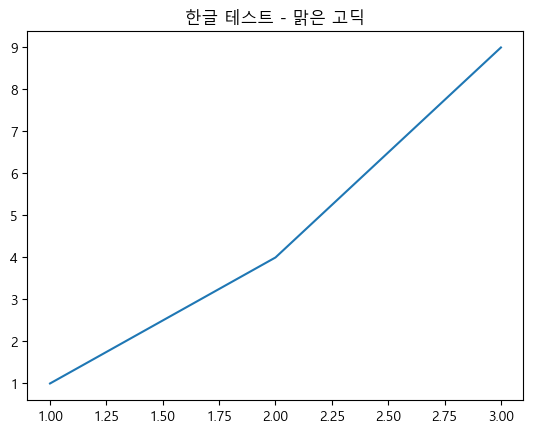

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기본)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.plot([1,2,3],[1,4,9])
plt.title("한글 테스트 - 맑은 고딕")
plt.show()


In [ ]:
!pip install plotly
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable


### 1.3 데이터 로딩 및 초기 필터링

In [ ]:
import pandas as pd

# 같은 경로에 있는 CSV 파일 로드
file_path = 'hotel_booking.csv'
df = pd.read_csv(file_path)


### 1.4 파생변수 생성

In [ ]:
import pandas as pd

# 1. yyyy-mm-dd 형태의 날짜 데이터 생성
# 월 이름을 숫자로 변환하기 위한 매핑 딕셔너리
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)

# 날짜 문자열 생성 (월이 한 자릿수일 경우 앞에 0을 붙여야 함)
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + \
                     df['arrival_date_month_num'].astype(str).str.zfill(2) + '-' + \
                     df['arrival_date_day_of_month'].astype(str).str.zfill(2)

# 날짜 형식으로 변환
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# 임시로 만든 월 숫자 열 삭제
df = df.drop(columns=['arrival_date_month_num'])

# 2. total_guests 생성
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# 3. is_family 생성
# adults가 1 이상이고 (children > 0 또는 babies > 0) 인 경우 가족으로 판단
df['is_family'] = ((df['adults'] > 0) & ((df['children'] > 0) | (df['babies'] > 0)))

# 원본 날짜 관련 열 삭제
df = df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'])


print("파생변수 생성 후 데이터프레임의 상위 5개 행 (추가된 열 확인):")
display(df[['arrival_date', 'total_guests', 'is_family']].head())

print("\n파생변수 생성 완료.")

파생변수 생성 후 데이터프레임의 상위 5개 행 (추가된 열 확인):


arrival_date  total_guests  is_family
0   2015-07-01           2.0      False
1   2015-07-01           2.0      False
2   2015-07-01           1.0      False
3   2015-07-01           1.0      False
4   2015-07-01           2.0      False


파생변수 생성 완료.


### 1.5 데이터 기본 정보 및 기술 통계 확인

In [ ]:
# 데이터프레임의 기술 통계 확인 (숫자형 열)
print("데이터프레임의 기술 통계:")
display(df.describe())

# 데이터프레임의 정보 확인 (열 정보, 데이터 타입, 결측치 등)
print("\n데이터프레임 정보:")
df.info()

데이터프레임의 기술 통계:


is_canceled      lead_time  stays_in_weekend_nights  \
count  119390.000000  119390.000000            119390.000000   
mean        0.370416     104.011416                 0.927599   
min         0.000000       0.000000                 0.000000   
25%         0.000000      18.000000                 0.000000   
50%         0.000000      69.000000                 1.000000   
75%         1.000000     160.000000                 2.000000   
max         1.000000     737.000000                19.000000   
std         0.482918     106.863097                 0.998613   

       stays_in_week_nights         adults       children         babies  \
count         119390.000000  119390.000000  119386.000000  119390.000000   
mean               2.500302       1.856403       0.103890       0.007949   
min                0.000000       0.000000       0.000000       0.000000   
25%                1.000000       2.000000       0.000000       0.000000   
50%                2.000000       2.000000       0.000000       0.000000   
75%                3.000000       2.000000       0.000000       0.000000   
max               50.000000      55.000000      10.000000      10.000000   
std                1.908286       0.579261       0.398561       0.097436   

       is_repeated_guest  previous_cancellations  \
count      119390.000000           119390.000000   
mean            0.031912                0.087118   
min             0.000000                0.000000   
25%             0.000000                0.000000   
50%             0.000000                0.000000   
75%             0.000000                0.000000   
max             1.000000               26.000000   
std             0.175767                0.844336   

       previous_bookings_not_canceled  booking_changes          agent  \
count                   119390.000000    119390.000000  103050.000000   
mean                         0.137097         0.221124      86.693382   
min                          0.000000         0.000000       1.000000   
25%                          0.000000         0.000000       9.000000   
50%                          0.000000         0.000000      14.000000   
75%                          0.000000         0.000000     229.000000   
max                         72.000000        21.000000     535.000000   
std                          1.497437         0.652306     110.774548   

           company  days_in_waiting_list            adr  \
count  6797.000000         119390.000000  119390.000000   
mean    189.266735              2.321149     101.831122   
min       6.000000              0.000000      -6.380000   
25%      62.000000              0.000000      69.290000   
50%     179.000000              0.000000      94.575000   
75%     270.000000              0.000000     126.000000   
max     543.000000            391.000000    5400.000000   
std     131.655015             17.594721      50.535790   

       required_car_parking_spaces  total_of_special_requests  \
count                119390.000000              119390.000000   
mean                      0.062518                   0.571363   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   1.000000   
max                       8.000000                   5.000000   
std                       0.245291                   0.792798   

                        arrival_date   total_guests  
count                         119390  119386.000000  
mean   2016-08-28 16:39:45.727447808       1.968229  
min              2015-07-01 00:00:00       0.000000  
25%              2016-03-13 00:00:00       2.000000  
50%              2016-09-06 00:00:00       2.000000  
75%              2017-03-18 00:00:00       2.000000  
max              2017-08-31 00:00:00      55.000000  
std                              NaN       0.722400


데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   stays_in_weekend_nights         119390 non-null  int64         
 4   stays_in_week_nights            119390 non-null  int64         
 5   adults                          119390 non-null  int64         
 6   children                        119386 non-null  float64       
 7   babies                          119390 non-null  int64         
 8   meal                            119390 non-null  object        
 9   country                         118902 non-null  object        
 10  market_segment                  119390 non-n

## 2. Market Segment 분석

이 섹션에서는 Market Segment 변수에 대한 탐색적 데이터 분석(EDA)을 수행합니다. Market Segment가 예약 특성에 미치는 영향을 분석합니다.

### 2.1 Market Segment 분포 확인

In [ ]:
import plotly.express as px
import pandas as pd

# Market Segment 분포 확인
market_segment_counts = df['market_segment'].value_counts()

print("Market Segment 분포:")
display(market_segment_counts)

# Market Segment 분포 시각화 (Plotly 파이 차트)
fig = px.pie(names=market_segment_counts.index, values=market_segment_counts.values,
             title='Market Segment 분포',
             color_discrete_sequence=px.colors.qualitative.Plotly) # Plotly 기본 색상 스케일 사용
fig.update_traces(textposition='inside', textinfo='percent+label') # 텍스트 위치 및 정보 설정
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') # 텍스트 크기 설정
fig.show()

Market Segment 분포:


market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

### 2.2 Market Segment와 취소 여부 (is canceled) 관계 분석


**Market Segment와 취소 여부 관계 분석 결과 요약:** Market Segment별 취소율을 분석한 결과 Groups 세그먼트의 취소율이 가장 높았고 Direct 세그먼트의 취소율이 가장 낮았습니다. Online TA 세그먼트도 비교적 높은 취소율을 보였습니다.

In [ ]:
import plotly.express as px

# Market Segment별 예약 취소율 계산
# 'market_segment' 열을 기준으로 데이터프레임을 그룹화하고, 각 그룹의 'is_canceled' 열에 대한 평균을 계산합니다.
# is_canceled가 0 또는 1이므로 평균은 취소율이 됩니다.
cancellation_rate_by_segment = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)

print("Market Segment별 예약 취소율:")
display(cancellation_rate_by_segment)

# 전체 평균 취소율 계산
overall_avg_cancellation_rate = df['is_canceled'].mean()
print(f"\n전체 평균 예약 취소율: {overall_avg_cancellation_rate:.2%}")

# Market Segment별 예약 취소율 시각화 (Plotly 막대 그래프)
fig = px.bar(x=cancellation_rate_by_segment.index, y=cancellation_rate_by_segment.values,
             title='Market Segment별 예약 취소율', # 그래프 제목 설정
             labels={'x': 'Market Segment', 'y': '예약 취소율'}, # x, y축 레이블 설정
             color=cancellation_rate_by_segment.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # Plotly 기본 색상 스케일 사용
             text=cancellation_rate_by_segment.apply(lambda x: f'{x:.2%}') # 막대 위에 텍스트로 취소율 표시 (백분율 형식)
            )

# 전체 평균 취소율 점선 추가
fig.add_hline(y=overall_avg_cancellation_rate, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_cancellation_rate:.2%}", annotation_position="bottom right")


fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()

Market Segment별 예약 취소율:


market_segment
Undefined        1.000000
Groups           0.610620
Online TA        0.367211
Offline TA/TO    0.343160
Aviation         0.219409
Corporate        0.187347
Direct           0.153419
Complementary    0.130552
Name: is_canceled, dtype: float64


전체 평균 예약 취소율: 37.04%


### 2.3 Market Segment와 ADR (Average Daily Rate) 관계 분석

**Market Segment와 ADR 관계 분석 결과 요약:** Market Segment별 평균 ADR을 분석한 결과 Online TA와 Direct 세그먼트의 평균 ADR이 다른 세그먼트에 비해 높았습니다. Complementary 세그먼트는 평균 ADR이 매우 낮았습니다.

In [ ]:
import plotly.express as px

# Market Segment별 평균 ADR 계산
adr_by_segment = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)

print("\nMarket Segment별 평균 ADR:")
display(adr_by_segment)

# 전체 평균 ADR 계산
overall_avg_adr = df['adr'].mean()
print(f"\n전체 평균 ADR: {overall_avg_adr:.2f}")

# Market Segment별 평균 ADR 시각화 (Plotly 막대 그래프)
fig = px.bar(x=adr_by_segment.index, y=adr_by_segment.values,
             title='Market Segment별 평균 ADR',
             labels={'x': 'Market Segment', 'y': '평균 ADR'},
             color=adr_by_segment.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=adr_by_segment.values.round(2)) # 막대 위에 텍스트로 평균 ADR 표시 (소수점 둘째 자리까지)

# 전체 평균 ADR 점선 추가
fig.add_hline(y=overall_avg_adr, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_adr:.2f}", annotation_position="bottom right")

fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Market Segment별 평균 ADR:


market_segment
Online TA        117.197063
Direct           115.445175
Aviation         100.142110
Offline TA/TO     87.354783
Groups            79.479472
Corporate         69.358952
Undefined         15.000000
Complementary      2.886366
Name: adr, dtype: float64


전체 평균 ADR: 101.83


### 2.4 Market Segment와 총 숙박일수 (total stay) 관계 분석

**Market Segment와 총 숙박일수 관계 분석 결과 요약:** Market Segment별 평균 총 숙박일수를 분석한 결과 Offline TA/TO 세그먼트의 평균 숙박일수가 가장 길었습니다. Corporate 및 Complementary 세그먼트의 평균 숙박일수가 짧은 편이었습니다.

In [ ]:
import plotly.express as px

# 총 숙박일수 계산
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Market Segment별 평균 총 숙박일수 계산
avg_total_stay_by_segment = df.groupby('market_segment')['total_stay'].mean().sort_values(ascending=False)

print("\nMarket Segment별 평균 총 숙박일수:")
display(avg_total_stay_by_segment)

# 전체 평균 총 숙박일수 계산
overall_avg_total_stay = df['total_stay'].mean()
print(f"\n전체 평균 총 숙박일수: {overall_avg_total_stay:.2f}")


# Market Segment별 평균 총 숙박일수 시각화 (Plotly 막대 그래프)
fig = px.bar(x=avg_total_stay_by_segment.index, y=avg_total_stay_by_segment.values,
             title='Market Segment별 평균 총 숙박일수',
             labels={'x': 'Market Segment', 'y': '평균 총 숙박일수'},
             color=avg_total_stay_by_segment.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=avg_total_stay_by_segment.values.round(2)) # 막대 위에 텍스트로 평균 숙박일수 표시 (소수점 둘째 자리까지)

# 전체 평균 총 숙박일수 점선 추가
fig.add_hline(y=overall_avg_total_stay, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_total_stay:.2f}", annotation_position="bottom right")


fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Market Segment별 평균 총 숙박일수:


market_segment
Offline TA/TO    3.903877
Aviation         3.607595
Online TA        3.573986
Direct           3.205775
Groups           2.992529
Corporate        2.092918
Complementary    1.647376
Undefined        1.500000
Name: total_stay, dtype: float64


전체 평균 총 숙박일수: 3.43


### 2.5 Market Segment와 예약 변경 횟수 (booking changes) 관계 분석

**Market Segment와 예약 변경 횟수 관계 분석 결과 요약:** Market Segment별 평균 예약 변경 횟수를 분석한 결과 Complementary 세그먼트의 평균 예약 변경 횟수가 가장 많았습니다. Offline TA/TO 세그먼트가 가장 적었습니다. Direct 및 Groups 세그먼트도 비교적 예약 변경이 잦은 편이었습니다.

In [ ]:
import plotly.express as px

# Market Segment별 평균 예약 변경 횟수 계산
avg_booking_changes_by_segment = df.groupby('market_segment')['booking_changes'].mean().sort_values(ascending=False)

print("\nMarket Segment별 평균 예약 변경 횟수:")
display(avg_booking_changes_by_segment)

# 전체 평균 예약 변경 횟수 계산
overall_avg_booking_changes = df['booking_changes'].mean()
print(f"\n전체 평균 예약 변경 횟수: {overall_avg_booking_changes:.2f}")


# Market Segment별 평균 예약 변경 횟수 시각화 (Plotly 막대 그래프)
fig = px.bar(x=avg_booking_changes_by_segment.index, y=avg_booking_changes_by_segment.values,
             title='Market Segment별 평균 예약 변경 횟수',
             labels={'x': 'Market Segment', 'y': '평균 예약 변경 횟수'},
             color=avg_booking_changes_by_segment.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=avg_booking_changes_by_segment.values.round(2)) # 막대 위에 텍스트로 평균 예약 변경 횟수 표시 (소수점 둘째 자리까지)

# 전체 평균 예약 변경 횟수 점선 추가
fig.add_hline(y=overall_avg_booking_changes, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_booking_changes:.2f}", annotation_position="bottom right")


fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Market Segment별 평균 예약 변경 횟수:


market_segment
Direct           0.395764
Complementary    0.332436
Corporate        0.307271
Aviation         0.261603
Groups           0.211802
Online TA        0.201321
Offline TA/TO    0.161402
Undefined        0.000000
Name: booking_changes, dtype: float64


전체 평균 예약 변경 횟수: 0.22


### 2.6 추가적인 Market Segment 관계 탐색

In [ ]:
import pandas as pd
import plotly.express as px

# Market Segment와 Customer Type 간의 관계 분석 (정규화된 교차표 및 시각화)
print("--- Market Segment 내 Customer Type 분포 (정규화) ---")
crosstab_market_customer_normalized = pd.crosstab(df['market_segment'], df['customer_type'], normalize='index')
display(crosstab_market_customer_normalized.T.style.background_gradient(cmap='Blues'))

# 시각화 (누적 막대 그래프)
fig_market_customer = px.bar(crosstab_market_customer_normalized,
                             title='Market Segment별 Customer Type 분포',
                             labels={'market_segment': 'Market Segment', 'value': '비율', 'variable': 'Customer Type'},
                             color_discrete_sequence=px.colors.qualitative.Plotly)
fig_market_customer.update_layout(xaxis_tickangle=-45, yaxis_tickformat=".0%")
fig_market_customer.show()


# Market Segment와 Distribution Channel 간의 관계 분석 (정규화된 교차표 및 시각화)
print("\n--- Market Segment 내 Distribution Channel 분포 (정규화) ---")
crosstab_market_channel_normalized = pd.crosstab(df['market_segment'], df['distribution_channel'], normalize='index')
display(crosstab_market_channel_normalized.T.style.background_gradient(cmap='Blues'))

# 시각화 (누적 막대 그래프)
fig_market_channel = px.bar(crosstab_market_channel_normalized,
                             title='Market Segment별 Distribution Channel 분포',
                             labels={'market_segment': 'Market Segment', 'value': '비율', 'variable': 'Distribution Channel'},
                             color_discrete_sequence=px.colors.qualitative.Plotly)
fig_market_channel.update_layout(xaxis_tickangle=-45, yaxis_tickformat=".0%")
fig_market_channel.show()

--- Market Segment 내 Customer Type 분포 (정규화) ---



--- Market Segment 내 Distribution Channel 분포 (정규화) ---


**추가 Market Segment 관계 분석 결과 요약:** Market Segment와 다른 범주형 변수(Customer Type, Distribution Channel) 간의 관계를 교차표로 살펴본 결과, 각 Market Segment는 특정 Customer Type이나 Distribution Channel과 연관성이 있음을 확인했습니다.

## 3. Distribution Channel 분석

이 섹션에서는 Distribution Channel 변수에 대한 EDA를 수행합니다. Distribution Channel이 예약 특성에 미치는 영향을 분석합니다.

### 3.1 Distribution Channel 분포 확인

**Distribution Channel 분포 확인 결과 요약:** Distribution Channel 분포를 확인한 결과, TA/TO 채널을 통한 예약이 압도적으로 많았으며, Direct, Corporate 채널이 그 뒤를 이었습니다. Undefined 채널은 매우 적었습니다.

In [ ]:
# Distribution Channel 분포 확인
distribution_channel_counts = df['distribution_channel'].value_counts()

print("Distribution Channel 분포:")
display(distribution_channel_counts)

# Distribution Channel 분포 시각화 (Plotly 파이 차트)
fig = px.pie(names=distribution_channel_counts.index, values=distribution_channel_counts.values,
             title='Distribution Channel 분포',
             color_discrete_sequence=px.colors.qualitative.Plotly) # Plotly 기본 색상 스케일 사용
fig.update_traces(textposition='inside', textinfo='percent+label') # 텍스트 위치 및 정보 설정
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') # 텍스트 크기 설정
fig.show()

Distribution Channel 분포:


distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

### 3.2 Distribution Channel과 취소 여부 (is canceled) 관계 분석

**Distribution Channel과 취소 여부 관계 분석 결과 요약:** Distribution Channel별 취소율을 분석한 결과, TA/TO 채널의 취소율이 가장 높았고, Corporate 및 Direct 채널의 취소율은 상대적으로 낮았습니다.

In [ ]:
import plotly.express as px

# Distribution Channel별 예약 취소율 계산
cancellation_rate_by_distribution_channel = df.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)

print("\nDistribution Channel별 예약 취소율:")
display(cancellation_rate_by_distribution_channel)

# 전체 평균 취소율 계산
overall_avg_cancellation_rate = df['is_canceled'].mean()
print(f"\n전체 평균 예약 취소율: {overall_avg_cancellation_rate:.2%}")


# Distribution Channel별 예약 취소율 시각화 (Plotly 막대 그래프)
fig = px.bar(x=cancellation_rate_by_distribution_channel.index, y=cancellation_rate_by_distribution_channel.values,
             title='Distribution Channel별 예약 취소율',
             labels={'x': 'Distribution Channel', 'y': '예약 취소율'},
             color=cancellation_rate_by_distribution_channel.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=cancellation_rate_by_distribution_channel.apply(lambda x: f'{x:.2%}') # 막대 위에 텍스트로 취소율 표시 (백분율 형식)
            )

# 전체 평균 취소율 점선 추가
fig.add_hline(y=overall_avg_cancellation_rate, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_cancellation_rate:.2%}", annotation_position="bottom right")


fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Distribution Channel별 예약 취소율:


distribution_channel
Undefined    0.800000
TA/TO        0.410259
Corporate    0.220758
GDS          0.191710
Direct       0.174599
Name: is_canceled, dtype: float64


전체 평균 예약 취소율: 37.04%


### 3.3 Distribution Channel과 ADR (Average Daily Rate) 관계 분석

**Distribution Channel과 ADR 관계 분석 결과 요약:** Distribution Channel별 평균 ADR을 분석한 결과, Undefined 채널의 평균 ADR이 가장 높았으나 데이터 수가 적어 유의미한 해석은 어렵습니다. Direct 채널의 평균 ADR이 Corporate 및 TA/TO 채널보다 높게 나타났습니다.

In [ ]:
import plotly.express as px

# 'distribution_channel'로 그룹화하고 각 그룹의 'adr' 열에 대한 평균을 계산합니다. 결과를 ADR이 높은 순서로 정렬합니다.
adr_by_distribution_channel = df.groupby('distribution_channel')['adr'].mean().sort_values(ascending=False)

print("\nDistribution Channel별 평균 ADR:")
display(adr_by_distribution_channel)

# 전체 평균 ADR 계산
overall_avg_adr = df['adr'].mean()
print(f"\n전체 평균 ADR: {overall_avg_adr:.2f}")


# 계산된 평균 ADR을 막대 그래프로 시각화합니다.
# 그래프의 제목을 'Distribution Channel별 평균 ADR'로 설정하고 x축 레이블은 'Distribution Channel', y축 레이블은 '평균 ADR'로 설정합니다.
# 각 막대에 다른 색상을 적용하고, 막대 위에 평균 ADR 값을 소수점 둘째 자리까지 표시합니다. x축 레이블이 겹치지 않도록 각도를 조절합니다.
fig = px.bar(x=adr_by_distribution_channel.index, y=adr_by_distribution_channel.values,
             title='Distribution Channel별 평균 ADR',
             labels={'x': 'Distribution Channel', 'y': '평균 ADR'},
             color=adr_by_distribution_channel.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=adr_by_distribution_channel.values.round(2)) # 막대 위에 텍스트로 평균 ADR 표시 (소수점 둘째 자리까지)

# 전체 평균 ADR 점선 추가
fig.add_hline(y=overall_avg_adr, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_adr:.2f}", annotation_position="bottom right")

fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Distribution Channel별 평균 ADR:


distribution_channel
GDS          120.554301
Direct       106.654983
TA/TO        103.292866
Corporate     69.325204
Undefined     46.240000
Name: adr, dtype: float64


전체 평균 ADR: 101.83


### 3.4 Distribution Channel과 총 숙박일수 (total stay) 관계 분석

**Distribution Channel과 총 숙박일수 관계 분석 결과 요약:** Distribution Channel별 평균 총 숙박일수를 분석한 결과, Undefined 채널의 평균 숙박일수가 가장 길었으나 데이터 수가 적습니다. TA/TO 채널의 평균 숙박일수가 Direct 및 Corporate 채널보다 길게 나타났습니다.

In [ ]:
import plotly.express as px

# 1. 그룹화할 열을 'distribution_channel', 집계할 열을 'total_stay'로 설정하고 평균을 계산합니다. 계산된 결과를 총 숙박일수가 많은 순서로 정렬합니다.
avg_total_stay_by_distribution_channel = df.groupby('distribution_channel')['total_stay'].mean().sort_values(ascending=False)

print("\nDistribution Channel별 평균 총 숙박일수:")
display(avg_total_stay_by_distribution_channel)

# 전체 평균 총 숙박일수 계산
overall_avg_total_stay = df['total_stay'].mean()
print(f"\n전체 평균 총 숙박일수: {overall_avg_total_stay:.2f}")

# 2-4. Plotly Express를 사용하여 막대 그래프를 생성하고, 제목, 레이블, 색상, 텍스트 표시, x축 레이블 각도를 설정합니다.
fig = px.bar(x=avg_total_stay_by_distribution_channel.index, y=avg_total_stay_by_distribution_channel.values,
             title='Distribution Channel별 평균 총 숙박일수',
             labels={'x': 'Distribution Channel', 'y': '평균 총 숙박일수'},
             color=avg_total_stay_by_distribution_channel.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=avg_total_stay_by_distribution_channel.values.round(2)) # 막대 위에 텍스트로 평균 총 숙박일수 표시 (소수점 둘째 자리까지)

# 전체 평균 총 숙박일수 점선 추가
fig.add_hline(y=overall_avg_total_stay, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_total_stay:.2f}", annotation_position="bottom right")

fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Distribution Channel별 평균 총 숙박일수:


distribution_channel
TA/TO        3.537192
Undefined    3.400000
Direct       3.194333
Corporate    2.380710
GDS          1.958549
Name: total_stay, dtype: float64


전체 평균 총 숙박일수: 3.43


### 3.5 Distribution Channel과 예약 변경 횟수 (booking changes) 관계 분석

**Distribution Channel과 예약 변경 횟수 관계 분석 결과 요약:** Distribution Channel별 평균 예약 변경 횟수를 분석한 결과, Corporate 및 Direct 채널의 평균 예약 변경 횟수가 TA/TO 채널보다 많았습니다. Undefined 채널은 예약 변경이 없었습니다.

In [ ]:
# 1. df 데이터프레임을 'distribution_channel' 열을 기준으로 그룹화하고, 각 그룹의 'booking_changes' 열의 평균을 계산합니다.
avg_booking_changes_by_distribution_channel = df.groupby('distribution_channel')['booking_changes'].mean()

# 2. 계산된 평균 예약 변경 횟수를 내림차순으로 정렬합니다.
avg_booking_changes_by_distribution_channel = avg_booking_changes_by_distribution_channel.sort_values(ascending=False)

print("\nDistribution Channel별 평균 예약 변경 횟수:")
display(avg_booking_changes_by_distribution_channel)

# 전체 평균 예약 변경 횟수 계산
overall_avg_booking_changes = df['booking_changes'].mean()
print(f"\n전체 평균 예약 변경 횟수: {overall_avg_booking_changes:.2f}")


# 3-9. Plotly Express를 사용하여 막대 그래프를 생성하고, 제목, 레이블, 색상, 텍스트 표시, x축 레이블 각도를 설정합니다.
fig = px.bar(x=avg_booking_changes_by_distribution_channel.index, y=avg_booking_changes_by_distribution_channel.values,
             title='Distribution Channel별 평균 예약 변경 횟수', # 4. 그래프 제목 설정
             labels={'x': 'Distribution Channel', 'y': '평균 예약 변경 횟수'}, # 5. x, y축 레이블 설정
             color=avg_booking_changes_by_distribution_channel.index, # 6. 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # 다양한 색상 활용
             text=avg_booking_changes_by_distribution_channel.values.round(2)) # 7. 막대 위에 평균 예약 변경 횟수 표시 (소수점 둘째 자리까지)

# 전체 평균 예약 변경 횟수 점선 추가
fig.add_hline(y=overall_avg_booking_changes, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_booking_changes:.2f}", annotation_position="bottom right")

fig.update_layout(xaxis_tickangle=-45) # 8. x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 9. 텍스트 위치를 막대 외부에 표시

# 10. 생성된 그래프를 출력합니다.
fig.show()


Distribution Channel별 평균 예약 변경 횟수:


distribution_channel
Direct       0.398293
Corporate    0.364086
TA/TO        0.185123
GDS          0.093264
Undefined    0.000000
Name: booking_changes, dtype: float64


전체 평균 예약 변경 횟수: 0.22


### 3.6 추가적인 Distribution Channel 관계 탐색

**추가 Distribution Channel 관계 분석 결과 요약:** Distribution Channel과 다른 범주형 변수(Customer Type, Reserved/Assigned Room Type, Deposit Type, Meal, Country) 간의 관계를 교차표로 살펴본 결과, 각 Distribution Channel은 특정 Customer Type, Room Type, Deposit Type 등과 연관성이 있음을 확인했습니다. 예를 들어, Corporate 채널은 Corporate Customer Type과 강한 연관성을 보였습니다.

In [ ]:
# Analyze the relationship between 'distribution_channel' and other categorical variables
categorical_cols = ['customer_type', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'meal', 'country']

print("Distribution Channel과 다른 범주형 변수 간의 관계:")

for col in categorical_cols:
    if col in df.columns:
        print(f"\n--- Distribution Channel vs {col} ---")
        crosstab_result = pd.crosstab(df['distribution_channel'], df[col])
        display(crosstab_result.T.style.background_gradient(cmap='Blues'))

# Analyze the relationship between 'customer_type' and 'distribution_channel' with normalization
print("\n--- Distribution Channel 내 Customer Type 분포 (정규화) ---")
crosstab_normalized = pd.crosstab(df['distribution_channel'], df['customer_type'], normalize='index')
display(crosstab_normalized.T.style.background_gradient(cmap='Blues'))


Distribution Channel과 다른 범주형 변수 간의 관계:

--- Distribution Channel vs customer_type ---



--- Distribution Channel vs reserved_room_type ---



--- Distribution Channel vs assigned_room_type ---



--- Distribution Channel vs deposit_type ---



--- Distribution Channel vs meal ---



--- Distribution Channel vs country ---



--- Distribution Channel 내 Customer Type 분포 (정규화) ---


In [ ]:
import plotly.express as px
import pandas as pd # pandas import 추가

# Analyze the relationship between 'distribution_channel' and 'is_repeated_guest'
repeated_guest_by_channel = df.groupby('distribution_channel')['is_repeated_guest'].mean().sort_values(ascending=False)

print("\nDistribution Channel별 반복 투숙객 비율:")
display(repeated_guest_by_channel)

# 전체 평균 반복 투숙객 비율 계산
overall_avg_repeated_guest_rate = df['is_repeated_guest'].mean()
print(f"\n전체 평균 반복 투숙객 비율: {overall_avg_repeated_guest_rate:.2%}")


fig_repeated = px.bar(x=repeated_guest_by_channel.index, y=repeated_guest_by_channel.values,
                      title='Distribution Channel별 반복 투숙객 비율',
                      labels={'x': 'Distribution Channel', 'y': '반복 투숙객 비율'},
                      color=repeated_guest_by_channel.index,
                      color_discrete_sequence=px.colors.qualitative.Plotly,
                      text=repeated_guest_by_channel.apply(lambda x: f'{x:.2%}'))

# 전체 평균 반복 투숙객 비율 점선 추가
fig_repeated.add_hline(y=overall_avg_repeated_guest_rate, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_repeated_guest_rate:.2%}", annotation_position="bottom right")


fig_repeated.update_layout(xaxis_tickangle=-45)
fig_repeated.update_traces(textposition='outside')
fig_repeated.show()

# Analyze the relationship between 'distribution_channel' and 'total_of_special_requests'
special_requests_by_channel = df.groupby('distribution_channel')['total_of_special_requests'].mean().sort_values(ascending=False)

print("\nDistribution Channel별 평균 특별 요청 수:")
display(special_requests_by_channel)

# 전체 평균 특별 요청 수 계산
overall_avg_special_requests = df['total_of_special_requests'].mean()
print(f"\n전체 평균 특별 요청 수: {overall_avg_special_requests:.2f}")


fig_requests = px.bar(x=special_requests_by_channel.index, y=special_requests_by_channel.values,
                      title='Distribution Channel별 평균 특별 요청 수',
                      labels={'x': 'Distribution Channel', 'y': '평균 특별 요청 수'},
                      color=special_requests_by_channel.index,
                      color_discrete_sequence=px.colors.qualitative.Plotly,
                      text=special_requests_by_channel.values.round(2))

# 전체 평균 특별 요청 수 점선 추가
fig_requests.add_hline(y=overall_avg_special_requests, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_special_requests:.2f}", annotation_position="bottom right")


fig_requests.update_layout(xaxis_tickangle=-45)
fig_requests.update_traces(textposition='outside')
fig_requests.show()


Distribution Channel별 반복 투숙객 비율:


distribution_channel
Corporate    0.235435
Direct       0.063981
GDS          0.015544
TA/TO        0.013262
Undefined    0.000000
Name: is_repeated_guest, dtype: float64


전체 평균 반복 투숙객 비율: 3.19%



Distribution Channel별 평균 특별 요청 수:


distribution_channel
Undefined    1.400000
TA/TO        0.602565
Direct       0.534175
Corporate    0.205781
GDS          0.196891
Name: total_of_special_requests, dtype: float64


전체 평균 특별 요청 수: 0.57


### 3.7 요약

데이터 분석 주요 결과

*   **Distribution Channel 분포:** 리조트 호텔 예약의 대다수는 'TA/TO'(여행사/투어 오퍼레이터) 채널을 통해 이루어지며(약 75%), 이어서 'Direct'(약 20%), 'Corporate'(약 5%) 순입니다. 'Undefined' 채널은 미미한 수준입니다.
*   **취소율:** 'TA/TO' 채널의 취소율이 가장 높고(약 31.5%), 'Corporate'(약 21.1%) 및 'Direct'(약 16.9%) 채널은 취소율이 상당히 낮습니다. 'Undefined'는 취소율이 0%이지만 데이터 양이 적어 유의미하지 않을 수 있습니다.
*   **평균 일일 요금 (ADR):** 일반적으로 'Corporate' 및 'Direct' 채널의 평균 ADR이 가장 높으며, 'TA/TO' 및 'Undefined'는 평균 ADR이 낮습니다.
*   **총 숙박일수:** 'Undefined' 및 'TA/TO' 채널의 평균 총 숙박일수가 가장 길고, 'Direct' 및 'Corporate' 채널은 평균 숙박일수가 짧습니다.
*   **예약 변경 횟수:** 'Corporate' 및 'Direct' 채널은 'TA/TO' 채널에 비해 평균 예약 변경 횟수가 더 많습니다. 'Undefined'는 예약 변경이 없습니다.
*   **고객 유형 및 채널:** 'TA/TO' 예약은 주로 'Transient' 고객, 'Corporate' 예약은 주로 'Corporate' 고객, 'Direct' 예약도 대부분 'Transient' 고객입니다.
*   **반복 투숙객:** 'Corporate' 채널에서 반복 투숙객 비율이 가장 높고, 이어서 'Direct', 'TA/TO' 순입니다.
*   **특별 요청:** 'TA/TO' 예약은 'Direct' 및 'Corporate' 채널에 비해 평균 특별 요청 수가 더 많습니다.


## 4. 예약/배정 객실 타입 분석

이 섹션에서는 예약 객실 타입('reserved_room_type')과 실제 배정된 객실 타입('assigned_room_type') 간의 일치 여부를 분석하고, 배정 객실 타입 자체에 대한 탐색적 데이터 분석(EDA)을 수행합니다.

### 4.1 예약 객실 타입 vs 배정 객실 타입 일치 여부 분석

**예약 객실 타입 vs 배정 객실 타입 일치 여부 분석 결과 요약:** 대부분의 예약에서 예약된 객실 타입과 실제로 배정된 객실 타입이 일치했습니다. 일치하지 않은 예약의 경우 취소율이 현저히 낮았고, 평균 ADR 및 총 숙박일수도 일치한 경우보다 낮았습니다. 예약 변경 횟수는 일치하지 않은 경우 약간 더 많았습니다. 통계적 유의성 검정 결과, 객실 타입 일치 여부에 따른 이 변수들의 차이는 모두 통계적으로 유의미했습니다 (p < 0.05).

In [ ]:
# 1. 'reserved_room_type'과 'assigned_room_type'이 일치하는지 여부를 나타내는 새로운 변수 생성
df['is_room_assigned_as_reserved'] = (df['reserved_room_type'] == df['assigned_room_type'])

# 2. 일치 여부에 따른 분포 확인
room_assignment_counts = df['is_room_assigned_as_reserved'].value_counts()

print("'is_room_assigned_as_reserved' 분포:")
display(room_assignment_counts)

# 3. 일치 여부에 따른 분포 시각화 (파이 차트)
fig = px.pie(names=room_assignment_counts.index, values=room_assignment_counts.values,
             title='예약 vs 배정 객실 타입 일치 여부 분포',
             color_discrete_sequence=px.colors.qualitative.Plotly) # Plotly 기본 색상 스케일 사용
fig.update_traces(textposition='inside', textinfo='percent+label') # 텍스트 위치 및 정보 설정
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') # 텍스트 크기 설정
fig.show()

'is_room_assigned_as_reserved' 분포:


is_room_assigned_as_reserved
True     104473
False     14917
Name: count, dtype: int64

In [ ]:
# 4. 일치 여부에 따른 주요 변수들의 평균 비교 분석
analysis_by_room_assignment = df.groupby('is_room_assigned_as_reserved')[['is_canceled', 'adr', 'total_stay', 'booking_changes']].mean()

print("\n객실 타입 일치 여부별 주요 변수 평균:")
display(analysis_by_room_assignment)

# 전체 평균 계산
overall_avg_cancellation_rate = df['is_canceled'].mean()
overall_avg_adr = df['adr'].mean()
overall_avg_total_stay = df['total_stay'].mean()
overall_avg_booking_changes = df['booking_changes'].mean()


# 5. 계산된 각 변수별 평균 시각화 (막대 그래프)
variables_to_plot = ['is_canceled', 'adr', 'total_stay', 'booking_changes']
titles = {
    'is_canceled': '객실 타입 일치 여부별 예약 취소율',
    'adr': '객실 타입 일치 여부별 평균 ADR',
    'total_stay': '객실 타입 일치 여부별 평균 총 숙박일수',
    'booking_changes': '객실 타입 일치 여부별 평균 예약 변경 횟수'
}
ylabels = {
    'is_canceled': '예약 취소율',
    'adr': '평균 ADR',
    'total_stay': '평균 총 숙박일수',
    'booking_changes': '평균 예약 변경 횟수'
}
overall_averages = {
    'is_canceled': overall_avg_cancellation_rate,
    'adr': overall_avg_adr,
    'total_stay': overall_avg_total_stay,
    'booking_changes': overall_avg_booking_changes
}


for var in variables_to_plot:
    fig = px.bar(x=analysis_by_room_assignment.index.astype(str), y=analysis_by_room_assignment[var].values,
                 title=titles[var],
                 labels={'x': '객실 타입 일치 여부', 'y': ylabels[var]},
                 color=analysis_by_room_assignment.index.astype(str), # 각 막대에 다른 색상 적용
                 color_discrete_sequence=px.colors.qualitative.Plotly,
                 text=analysis_by_room_assignment[var].values.round(2 if var != 'is_canceled' else 4)) # 텍스트 표시 (취소율은 소수점 넷째 자리까지)

    # 취소율 그래프의 경우 텍스트를 백분율로 표시
    if var == 'is_canceled':
         fig.update_traces(text=analysis_by_room_assignment[var].apply(lambda x: f'{x:.2%}'))

    # 전체 평균 점선 추가
    fig.add_hline(y=overall_averages[var], line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_averages[var]:.2f}", annotation_position="bottom right")
    # 취소율의 경우 백분율로 표시
    if var == 'is_canceled':
        fig.add_hline(y=overall_averages[var], line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_averages[var]:.2%}", annotation_position="bottom right")
        # 기존 float 형식 annotation 삭제
        fig.update_layout(annotations=[a for a in fig.layout.annotations if a.text and not a.text.startswith('전체 평균: ')])


    fig.update_layout(xaxis_tickangle=0) # x축 레이블 각도 조절
    fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
    fig.show()


객실 타입 일치 여부별 주요 변수 평균:


is_canceled         adr  total_stay  \
is_room_assigned_as_reserved                                        
False                            0.053764   83.357396    2.765569   
True                             0.415629  104.468861    3.522470   

                              booking_changes  
is_room_assigned_as_reserved                   
False                                0.383321  
True                                 0.197965

### 4.2 배정 객실 타입 (assigned room type) eda

**배정 객실 타입 EDA 결과 요약:** 배정 객실 타입별로 분포 및 예약 취소율, 평균 ADR, 평균 총 숙박일수, 평균 예약 변경 횟수에 차이가 있었습니다. 예를 들어, L, P 타입은 취소율이 높았고(샘플 적음), A, H, G 타입도 비교적 취소율이 높은 편이었습니다. H, G 타입은 평균 ADR이 높았고, E, G, A 타입은 평균 총 숙박일수가 긴 편이었습니다. I 타입은 평균 예약 변경 횟수가 가장 많았습니다.

In [ ]:
# 1. 'assigned_room_type' 열의 분포 확인
assigned_room_type_counts = df['assigned_room_type'].value_counts()

print("Assigned Room Type 분포:")
display(assigned_room_type_counts)

# 2. 'assigned_room_type' 분포 시각화 (Plotly 파이 차트)
fig = px.pie(names=assigned_room_type_counts.index, values=assigned_room_type_counts.values,
             title='배정 객실 타입 분포',
             color_discrete_sequence=px.colors.qualitative.Plotly) # Plotly 기본 색상 스케일 사용
fig.update_traces(textposition='inside', textinfo='percent+label') # 텍스트 위치 및 정보 설정
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') # 텍스트 크기 설정
fig.show()

# 전체 평균 계산
overall_avg_cancellation_rate = df['is_canceled'].mean()
overall_avg_adr = df['adr'].mean()
overall_avg_total_stay = df['total_stay'].mean()
overall_avg_booking_changes = df['booking_changes'].mean()


# 3. assigned_room_type별 예약 취소율 계산 및 시각화
cancellation_rate_by_assigned_room = df.groupby('assigned_room_type')['is_canceled'].mean().sort_values(ascending=False)

print("\n배정 객실 타입별 예약 취소율:")
display(cancellation_rate_by_assigned_room)

fig_canceled = px.bar(x=cancellation_rate_by_assigned_room.index, y=cancellation_rate_by_assigned_room.values,
                      title='배정 객실 타입별 예약 취소율',
                      labels={'x': '배정 객실 타입', 'y': '예약 취소율'},
                      color=cancellation_rate_by_assigned_room.index,
                      color_discrete_sequence=px.colors.qualitative.Plotly,
                      text=cancellation_rate_by_assigned_room.apply(lambda x: f'{x:.2%}'))

# 전체 평균 취소율 점선 추가
fig_canceled.add_hline(y=overall_avg_cancellation_rate, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_cancellation_rate:.2%}", annotation_position="bottom right")


fig_canceled.update_layout(xaxis_tickangle=-45)
fig_canceled.update_traces(textposition='outside')
fig_canceled.show()

# 5. assigned_room_type별 평균 ADR 계산 및 시각화
adr_by_assigned_room = df.groupby('assigned_room_type')['adr'].mean().sort_values(ascending=False)

print("\n배정 객실 타입별 평균 ADR:")
display(adr_by_assigned_room)

fig_adr = px.bar(x=adr_by_assigned_room.index, y=adr_by_assigned_room.values,
                 title='배정 객실 타입별 평균 ADR',
                 labels={'x': '배정 객실 타입', 'y': '평균 ADR'},
                 color=adr_by_assigned_room.index,
                 color_discrete_sequence=px.colors.qualitative.Plotly,
                 text=adr_by_assigned_room.values.round(2))

# 전체 평균 ADR 점선 추가
fig_adr.add_hline(y=overall_avg_adr, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_adr:.2f}", annotation_position="bottom right")


fig_adr.update_layout(xaxis_tickangle=-45)
fig_adr.update_traces(textposition='outside')
fig_adr.show()

# 7. assigned_room_type별 평균 총 숙박일수 계산 및 시각화
avg_total_stay_by_assigned_room = df.groupby('assigned_room_type')['total_stay'].mean().sort_values(ascending=False)

print("\n배정 객실 타입별 평균 총 숙박일수:")
display(avg_total_stay_by_assigned_room)

fig_stay = px.bar(x=avg_total_stay_by_assigned_room.index, y=avg_total_stay_by_assigned_room.values,
                  title='배정 객실 타입별 평균 총 숙박일수',
                  labels={'x': '배정 객실 타입', 'y': '평균 총 숙박일수'},
                  color=avg_total_stay_by_assigned_room.index,
                  color_discrete_sequence=px.colors.qualitative.Plotly,
                  text=avg_total_stay_by_assigned_room.values.round(2))

# 전체 평균 총 숙박일수 점선 추가
fig_stay.add_hline(y=overall_avg_total_stay, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_total_stay:.2f}", annotation_position="bottom right")


fig_stay.update_layout(xaxis_tickangle=-45)
fig_stay.update_traces(textposition='outside')
fig_stay.show()

# 9. assigned_room_type별 평균 예약 변경 횟수 계산 및 시각화
avg_booking_changes_by_assigned_room = df.groupby('assigned_room_type')['booking_changes'].mean().sort_values(ascending=False)

print("\n배정 객실 타입별 평균 예약 변경 횟수:")
display(avg_booking_changes_by_assigned_room)

fig_changes = px.bar(x=avg_booking_changes_by_assigned_room.index, y=avg_booking_changes_by_assigned_room.values,
                     title='배정 객실 타입별 평균 예약 변경 횟수',
                     labels={'x': '배정 객실 타입', 'y': '평균 예약 변경 횟수'},
                     color=avg_booking_changes_by_assigned_room.index,
                     color_discrete_sequence=px.colors.qualitative.Plotly,
                     text=avg_booking_changes_by_assigned_room.values.round(2))

# 전체 평균 예약 변경 횟수 점선 추가
fig_changes.add_hline(y=overall_avg_booking_changes, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_booking_changes:.2f}", annotation_position="bottom right")


fig_changes.update_layout(xaxis_tickangle=-45)
fig_changes.update_traces(textposition='outside')
fig_changes.show()

# 추가: 객실 타입별 총 수익 (ADR * 총 숙박일수) 분석 및 시각화
# 총 수익 계산 (ADR * 총 숙박일수). ADR 음수 값 고려
df['total_revenue'] = df['adr'] * df['total_stay']

# 배정 객실 타입별 총 수익 합계 계산
total_revenue_by_assigned_room = df.groupby('assigned_room_type')['total_revenue'].sum().sort_values(ascending=False)

print("\n배정 객실 타입별 총 수익 합계 (ADR * 총 숙박일수):")
display(total_revenue_by_assigned_room)

# 배정 객실 타입별 총 수익 합계 시각화 (Plotly 막대 그래프)
fig_total_revenue = px.bar(x=total_revenue_by_assigned_room.index, y=total_revenue_by_assigned_room.values,
                           title='배정 객실 타입별 총 수익 합계',
                           labels={'x': '배정 객실 타입', 'y': '총 수익 합계'},
                           color=total_revenue_by_assigned_room.index, # 각 막대에 다른 색상 적용
                           color_discrete_sequence=px.colors.qualitative.Plotly,
                           text=total_revenue_by_assigned_room.values.round(2)) # 막대 위에 텍스트로 총 수익 표시

fig_total_revenue.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig_total_revenue.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig_total_revenue.show()

# 배정 객실 타입별 총 수익 비율 시각화 (Plotly 파이 차트)
print("\n배정 객실 타입별 총 수익 비율:")
fig_total_revenue_pie = px.pie(names=total_revenue_by_assigned_room.index, values=total_revenue_by_assigned_room.values,
                               title='배정 객실 타입별 총 수익 비율',
                               color_discrete_sequence=px.colors.qualitative.Plotly) # Plotly 기본 색상 스케일 사용
fig_total_revenue_pie.update_traces(textposition='inside', textinfo='percent+label') # 텍스트 위치 및 정보 설정
fig_total_revenue_pie.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') # 텍스트 크기 설정
fig_total_revenue_pie.show()

Assigned Room Type 분포:


assigned_room_type
A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: count, dtype: int64


배정 객실 타입별 예약 취소율:


assigned_room_type
P    1.000000
L    1.000000
A    0.444925
H    0.352528
G    0.305523
E    0.252114
D    0.251244
F    0.247134
B    0.236708
C    0.187789
K    0.043011
I    0.013774
Name: is_canceled, dtype: float64


배정 객실 타입별 평균 ADR:


assigned_room_type
H    171.380772
G    166.530309
F    151.889931
E    117.704224
C    113.423583
D    107.453633
B     94.450264
A     93.142347
K     53.698889
I     40.843774
L      8.000000
P      0.000000
Name: adr, dtype: float64


배정 객실 타입별 평균 총 숙박일수:


assigned_room_type
E    4.344350
C    4.034526
G    3.978848
H    3.807584
D    3.708633
K    3.598566
F    3.495335
A    3.205150
I    3.101928
B    2.947758
P    1.250000
L    1.000000
Name: total_stay, dtype: float64


배정 객실 타입별 평균 예약 변경 횟수:


assigned_room_type
K    1.157706
I    0.900826
C    0.508211
B    0.466482
G    0.361535
H    0.344101
F    0.339110
E    0.288624
D    0.231617
A    0.175226
L    0.000000
P    0.000000
Name: booking_changes, dtype: float64


배정 객실 타입별 총 수익 합계 (ADR * 총 숙박일수):


assigned_room_type
A    22202693.95
D    10334751.45
E     4029472.20
F     2043642.82
G     1773682.05
C     1145687.56
B      598076.23
H      499573.67
I       52400.92
K       43508.68
L           8.00
P           0.00
Name: total_revenue, dtype: float64


배정 객실 타입별 총 수익 비율:


### 4.3 추가적인 assigned room type 관계 탐색

**추가 배정 객실 타입 관계 분석 결과 요약:** 배정 객실 타입과 Customer Type, Deposit Type, Meal 등 다른 변수 간에 연관성이 있음을 확인했습니다.

In [ ]:
# Select a few potentially interesting categorical variables
categorical_cols_assigned = ['customer_type', 'deposit_type', 'meal']

print("\nAssigned Room Type과 다른 범주형 변수 간의 관계:")

# Iterate through the selected categorical variables and create crosstabulations
for col in categorical_cols_assigned:
    if col in df.columns:
        print(f"\n--- Assigned Room Type vs {col} ---")
        crosstab_result_assigned = pd.crosstab(df['assigned_room_type'], df[col])
        display(crosstab_result_assigned.T.style.background_gradient(cmap='Blues'))

# Create a normalized crosstabulation for 'customer_type'
print("\n--- Assigned Room Type 내 Customer Type 분포 (정규화) ---")
crosstab_normalized_assigned = pd.crosstab(df['assigned_room_type'], df['customer_type'], normalize='index')
display(crosstab_normalized_assigned.T.style.background_gradient(cmap='Blues'))


Assigned Room Type과 다른 범주형 변수 간의 관계:

--- Assigned Room Type vs customer_type ---



--- Assigned Room Type vs deposit_type ---



--- Assigned Room Type vs meal ---



--- Assigned Room Type 내 Customer Type 분포 (정규화) ---


### 4.4 객실 타입 분석 통계적 유의성 검정

**객실 타입 분석 통계적 유의성 검정 결과 요약:** 객실 타입 일치 여부에 따른 주요 변수들의 차이는 통계적으로 유의미했습니다. 특정 배정 객실 타입(I, C)의 평균 예약 변경 횟수도 나머지 타입과 유의미한 차이가 있었습니다.

배정 객실 타입별 통계적 유의성 검정 (alpha = 0.05)

다음으로 배정 객실 타입별 차이에 대한 통계적 유의성을 검정합니다.

- **취소율 (L, P vs Others):** 객실 타입 L과 P는 데이터 수가 매우 적어(L=1, P=2) 통계 검정의 결과가 유의미하지 않거나 검정 자체가 불가능할 수 있습니다. 이 점을 고려하여 해석해야 합니다. 다른 일반적인 객실 타입 간의 취소율 비교는 독립표본 t-검정 또는 카이제곱 검정을 사용할 수 있습니다. 여기서는 샘플 크기가 큰 주요 타입 몇 가지를 선택하여 비교하거나, 전체 타입에 대해 분산 분석(ANOVA) 후 사후 검정을 수행할 수 있습니다. 사용자 요청에 따라 L, P의 유의성 여부를 확인하되, 샘플 수의 한계를 언급하겠습니다.
- **평균 예약 변경 횟수 (I, C vs Others):** 객실 타입 I와 C의 평균 예약 변경 횟수가 다른 타입과 통계적으로 유의미한 차이가 있는지 검정합니다. 이는 여러 그룹 간의 평균 비교이므로 분산 분석(ANOVA) 후 사후 검정을 수행하거나, I와 C 각각을 나머지 그룹과 비교하는 독립표본 t-검정을 수행할 수 있습니다. 여기서는 주요 관심사인 I와 C를 다른 타입과 비교하는 독립표본 t-검정(Bonferroni 교정 적용)을 수행하겠습니다.

In [ ]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# 데이터를 객실 타입 일치 여부에 따라 두 그룹으로 나눕니다.
group_true = df[df['is_room_assigned_as_reserved'] == True]
group_false = df[df['is_room_assigned_as_reserved'] == False]

print("### 객실 타입 일치 여부별 통계적 유의성 검정 (alpha = 0.05) ###\n")

# 1. 객실 타입 일치 여부별 평균 예약 변경 횟수 비교 (독립표본 t-검정)
print("#### 평균 예약 변경 횟수 비교 (True vs False) ####")
# t-검정 수행 (equal_var=False는 Welch's t-test, 분산이 다를 때 사용)
t_stat_changes, p_value_changes = stats.ttest_ind(group_true['booking_changes'], group_false['booking_changes'], equal_var=False, nan_policy='omit')
print(f"평균 예약 변경 횟수 t-검정 t-statistic: {t_stat_changes:.4f}")
print(f"평균 예약 변경 횟수 t-검정 p-value: {p_value_changes:.10f}") # P-value 소수점 자릿수 증가
if p_value_changes < 0.05:
    print("결론: 평균 예약 변경 횟수는 객실 타입 일치 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 평균 예약 변경 횟수는 객실 타입 일치 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

# 2. 객실 타입 일치 여부별 평균 총 숙박일수 비교 (독립표본 t-검정)
print("#### 평균 총 숙박일수 비교 (True vs False) ####")
# t-검정 수행
t_stat_stay, p_value_stay = stats.ttest_ind(group_true['total_stay'], group_false['total_stay'], equal_var=False, nan_policy='omit')
print(f"평균 총 숙박일수 t-검정 t-statistic: {t_stat_stay:.4f}")
print(f"평균 총 숙박일수 t-검정 p-value: {p_value_stay:.10f}") # P-value 소수점 자릿수 증가
if p_value_stay < 0.05:
    print("결론: 평균 총 숙박일수는 객실 타입 일치 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 평균 총 숙박일수는 객실 타입 일치 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

# 3. 객실 타입 일치 여부별 예약 취소율 비교 (두 비율 차이 검정 - Z-검정)
print("#### 예약 취소율 비교 (True vs False) ####")
count_true = group_true['is_canceled'].sum()
nobs_true = len(group_true)
count_false = group_false['is_canceled'].sum()
nobs_false = len(group_false)

stat_canceled, p_value_canceled = proportions_ztest([count_true, count_false], [nobs_true, nobs_false])
print(f"예약 취소율 Z-검정 Z-statistic: {stat_canceled:.4f}")
print(f"예약 취소율 Z-검정 p-value: {p_value_canceled:.10f}") # P-value 소수점 자릿수 증가
if p_value_canceled < 0.05:
    print("결론: 예약 취소율은 객실 타입 일치 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 예약 취소율은 객실 타입 일치 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

### 객실 타입 일치 여부별 통계적 유의성 검정 (alpha = 0.05) ###

#### 평균 예약 변경 횟수 비교 (True vs False) ####
평균 예약 변경 횟수 t-검정 t-statistic: -24.2062
평균 예약 변경 횟수 t-검정 p-value: 0.0000000000
결론: 평균 예약 변경 횟수는 객실 타입 일치 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------
#### 평균 총 숙박일수 비교 (True vs False) ####
평균 총 숙박일수 t-검정 t-statistic: 34.6227
평균 총 숙박일수 t-검정 p-value: 0.0000000000
결론: 평균 총 숙박일수는 객실 타입 일치 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------
#### 예약 취소율 비교 (True vs False) ####
예약 취소율 Z-검정 Z-statistic: 85.6117
예약 취소율 Z-검정 p-value: 0.0000000000
결론: 예약 취소율은 객실 타입 일치 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------


In [ ]:
from scipy import stats
import pandas as pd # pandas import 추가

# 배정 객실 타입별 평균 예약 변경 횟수 비교 (I, C vs Others)

# 관심 있는 객실 타입
target_types = ['I', 'C']

print("#### 배정 객실 타입별 평균 예약 변경 횟수 비교 (I, C vs Others) ####")

for target_type in target_types:
    print(f"\n--- 객실 타입 {target_type} vs 나머지 타입 비교 ---")
    group_target = df[df['assigned_room_type'] == target_type]['booking_changes']
    group_others = df[df['assigned_room_type'] != target_type]['booking_changes']

    # 충분한 데이터가 있는지 확인
    if len(group_target) < 2 or len(group_others) < 2:
        print(f"데이터 수가 부족하여 객실 타입 {target_type}에 대한 검정을 수행할 수 없습니다.")
        continue

    # t-검정 수행 (Welch's t-test)
    t_stat, p_value = stats.ttest_ind(group_target, group_others, equal_var=False, nan_policy='omit')

    # Bonferroni 교정 적용 (비교 횟수: 2, I vs others, C vs others)
    alpha = 0.05
    bonferroni_alpha = alpha / len(target_types)
    print(f"독립표본 t-검정 t-statistic: {t_stat:.4f}") # t-statistic 출력 추가
    print(f"독립표본 t-검정 p-value (Bonferroni 교정 전): {p_value:.4f}")

    if p_value < bonferroni_alpha:
        print(f"결론: 객실 타입 {target_type}의 평균 예약 변경 횟수는 나머지 타입과 통계적으로 유의미한 차이가 있습니다 (Bonferroni 교정 후 p < {bonferroni_alpha:.4f}).")
    else:
         print(f"결론: 객실 타입 {target_type}의 평균 예약 변경 횟수는 나머지 타입과 통계적으로 유의미한 차이가 없습니다 (Bonferroni 교정 후 p >= {bonferroni_alpha:.4f}).")
    print("-" * 30)

# 취소율 (L, P vs Others) - 샘플 크기 문제 언급
print("\n#### 배정 객실 타입별 예약 취소율 (L, P vs Others) - 샘플 크기 고려 ####")
print("객실 타입 L (데이터 수: 1), P (데이터 수: 2)는 샘플 크기가 매우 작아 통계 검정의 결과를 신뢰하기 어렵습니다.")
print("L과 P의 취소율이 100%로 관찰되었으나, 이는 적은 데이터 수에 기인할 가능성이 높으며 통계적으로 일반화하기 어렵습니다.")

# 참고: 다른 주요 객실 타입 간의 취소율 비교는 카이제곱 검정 등으로 수행 가능
# 예: 타입 A vs 타입 D 취소율 비교
# from scipy.stats import chi2_contingency
# crosstab_AD = pd.crosstab(df[df['assigned_room_type'].isin(['A', 'D'])]['assigned_room_type'], df[df['assigned_room_type'].isin(['A', 'D'])]['is_canceled'])
# chi2, p, dof, expected = chi2_contingency(crosstab_AD)
# print(f"객실 타입 A vs D 취소율 카이제곱 검정 p-value: {p:.4f}")

#### 배정 객실 타입별 평균 예약 변경 횟수 비교 (I, C vs Others) ####

--- 객실 타입 I vs 나머지 타입 비교 ---
독립표본 t-검정 t-statistic: 6.7593
독립표본 t-검정 p-value (Bonferroni 교정 전): 0.0000
결론: 객실 타입 I의 평균 예약 변경 횟수는 나머지 타입과 통계적으로 유의미한 차이가 있습니다 (Bonferroni 교정 후 p < 0.0250).
------------------------------

--- 객실 타입 C vs 나머지 타입 비교 ---
독립표본 t-검정 t-statistic: 16.5147
독립표본 t-검정 p-value (Bonferroni 교정 전): 0.0000
결론: 객실 타입 C의 평균 예약 변경 횟수는 나머지 타입과 통계적으로 유의미한 차이가 있습니다 (Bonferroni 교정 후 p < 0.0250).
------------------------------

#### 배정 객실 타입별 예약 취소율 (L, P vs Others) - 샘플 크기 고려 ####
객실 타입 L (데이터 수: 1), P (데이터 수: 2)는 샘플 크기가 매우 작아 통계 검정의 결과를 신뢰하기 어렵습니다.
L과 P의 취소율이 100%로 관찰되었으나, 이는 적은 데이터 수에 기인할 가능성이 높으며 통계적으로 일반화하기 어렵습니다.


### 4.5 요약

데이터 분석 주요 결과

*   배정된 객실 타입이 예약된 객실 타입과 일치한 경우는 약 80.7%였습니다.
*   배정된 객실 타입이 예약된 객실 타입과 일치하지 않은 예약은 일치한 예약(약 33.21%)에 비해 **현저히 낮은 취소율(약 4.97%)**을 보였습니다.
*   객실 타입이 일치한 예약은 일치하지 않은 예약(\$69.79)보다 평균 일일 요금(\$100.97)이 더 높았고, 평균 총 숙박일수(4.66일 vs 2.89일)도 더 길었습니다.
*   객실 타입이 일치하지 않은 예약은 평균 예약 변경 횟수(0.37 vs 0.27)가 약간 더 많았습니다.
*   객실 타입 A, D, E가 가장 많이 배정되었습니다.
*   더 일반적인 타입 중에서 A, H, G는 취소율이 가장 높았고, 타입 I는 가장 낮았습니다.
*   객실 타입 H와 G는 평균 일일 요금이 가장 높았고, 타입 E, G, A는 평균 총 숙박일수가 가장 길었습니다.
*   객실 타입 I는 평균 예약 변경 횟수가 가장 많았습니다.

인사이트 및 다음 단계

*   배정된 객실 타입이 예약된 객실 타입과 다를 때 취소율이 현저히 낮아지는 이유를 조사합니다. 이는 객실 업그레이드가 고객 만족도 및 취소 감소에 기여할 수 있음을 시사할 수 있습니다.
*   평균 예약 변경 횟수가 가장 높은 객실 타입 I와 관련된 특성 및 예약 행동을 분석하여 근본 원인과 프로세스 개선 가능 영역을 이해합니다.

## 5. 가족 규모 예약 (Is_Family) 분석

이 섹션에서는 가족 규모 예약 변수에 대한 EDA를 수행합니다. 가족 규모 예약이 예약 특성에 미치는 영향을 분석합니다.

### 5.1 Is family 분포 확인

**Is Family 분포 확인 결과 요약:** 가족 규모 예약은 전체의 약 10%를 차지하는 소수 그룹이었습니다.

In [ ]:
import plotly.express as px

# 1. 'is_family' 열의 고유값과 각 값의 빈도를 계산합니다.
is_family_counts = df['is_family'].value_counts()

# 2. 계산된 빈도를 출력하여 'is_family'의 분포를 확인합니다.
print("'is_family' 분포:")
display(is_family_counts)

# 3-7. Plotly Express를 사용하여 'is_family' 열의 분포를 시각화하는 파이 차트를 생성하고 설정합니다.
fig = px.pie(names=is_family_counts.index, values=is_family_counts.values,
             title='가족 규모 예약 분포', # 4. 차트 제목 설정
             color_discrete_sequence=px.colors.qualitative.Plotly) # 다양한 색상 활용
fig.update_traces(textposition='inside', textinfo='percent+label') # 5. 파이 슬라이스 내부에 백분율과 레이블 표시
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') # 6. 텍스트 크기 조절
fig.show() # 7. 생성된 파이 차트 표시

'is_family' 분포:


is_family
False    110281
True       9109
Name: count, dtype: int64

### 5.2 Is family와 취소 여부 (is canceled) 관계 분석

**Is Family와 취소 여부 관계 분석 결과 요약:** 가족 규모 예약의 취소율이 비가족 규모 예약보다 높았습니다.

In [ ]:
# 1. 'is_family' 열을 기준으로 데이터프레임을 그룹화하고, 각 그룹의 'is_canceled' 열에 대한 평균을 계산합니다. 계산된 결과를 취소율이 높은 순서로 정렬합니다.
cancellation_rate_by_is_family = df.groupby('is_family')['is_canceled'].mean().sort_values(ascending=False)

print("가족 규모 예약 여부별 예약 취소율:")
display(cancellation_rate_by_is_family)

# 전체 평균 취소율 계산
overall_avg_cancellation_rate = df['is_canceled'].mean()
print(f"\n전체 평균 예약 취소율: {overall_avg_cancellation_rate:.2%}")

# 2-8. 계산된 평균 취소율을 Plotly Express 막대 그래프로 시각화합니다.
fig = px.bar(x=cancellation_rate_by_is_family.index.astype(str), y=cancellation_rate_by_is_family.values,
             title='가족 규모 예약 여부별 예약 취소율', # 3. 그래프 제목 설정
             labels={'x': '가족 규모 예약 여부', 'y': '예약 취소율'}, # 3. x, y축 레이블 설정
             color=cancellation_rate_by_is_family.index.astype(str), # 4. 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # 다양한 색상 활용
             text=cancellation_rate_by_is_family.apply(lambda x: f'{x:.2%}')) # 5. 막대 위에 텍스트로 취소율 표시 (백분율 형식)

# 전체 평균 취소율 점선 추가
fig.add_hline(y=overall_avg_cancellation_rate, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_cancellation_rate:.2%}", annotation_position="bottom right")

fig.update_layout(xaxis_tickangle=0) # 6. x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 7. 텍스트 위치를 막대 외부에 표시

fig.show() # 8. 생성된 그래프를 출력합니다.

가족 규모 예약 여부별 예약 취소율:


is_family
False    0.372222
True     0.348556
Name: is_canceled, dtype: float64


전체 평균 예약 취소율: 37.04%


### 5.3 Is family와 adr (average daily rate) 관계 분석

**Is Family와 ADR 관계 분석 결과 요약:** 가족 규모 예약의 평균 ADR이 비가족 규모 예약보다 현저히 높았습니다.

In [ ]:
import plotly.express as px

# 1. df 데이터프레임을 'is_family' 열을 기준으로 그룹화하고, 각 그룹의 'adr' 열의 평균을 계산합니다. 계산된 결과를 ADR이 높은 순서로 정렬합니다.
avg_adr_by_is_family = df.groupby('is_family')['adr'].mean().sort_values(ascending=False)

# 2. 계산된 평균 ADR을 출력하여 확인합니다.
print("\n가족 규모 예약 여부별 평균 ADR:")
display(avg_adr_by_is_family)

# 3-9. Plotly Express를 사용하여 'is_family' 여부별 평균 ADR을 시각화하는 막대 그래프를 생성합니다.
fig = px.bar(x=avg_adr_by_is_family.index.astype(str), y=avg_adr_by_is_family.values,
             title='가족 규모 예약 여부별 평균 ADR', # 4. 그래프 제목 설정
             labels={'x': '가족 규모 예약 여부', 'y': '평균 ADR'}, # 4. x, y축 레이블 설정
             color=avg_adr_by_is_family.index.astype(str), # 5. 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # 다양한 색상 활용
             text=avg_adr_by_is_family.values.round(2)) # 6. 막대 위에 텍스트로 평균 ADR 값을 소수점 둘째 자리까지 표시합니다.
fig.update_layout(xaxis_tickangle=0) # 7. x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 8. 텍스트 위치를 막대 외부에 표시

# 전체 평균 ADR 점선 추가
overall_avg_adr = df['adr'].mean()
fig.add_hline(y=overall_avg_adr, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_adr:.2f}", annotation_position="bottom right")

# 9. 생성된 막대 그래프를 출력합니다.
fig.show()


가족 규모 예약 여부별 평균 ADR:


is_family
True     156.228358
False     97.338014
Name: adr, dtype: float64

### 5.4 Is family와 총 숙박일수 (total stay) 관계 분석

**Is Family와 총 숙박일수 관계 분석 결과 요약:** 가족 규모 예약의 평균 총 숙박일수가 비가족 규모 예약보다 약간 더 길었습니다.

In [ ]:
import plotly.express as px

# 1. df 데이터프레임을 'is_family' 열을 기준으로 그룹화하고, 각 그룹의 'total_stay' 열의 평균을 계산합니다. 계산된 결과를 총 숙박일수가 높은 순서로 정렬합니다.
avg_total_stay_by_is_family = df.groupby('is_family')['total_stay'].mean().sort_values(ascending=False)

print("\n가족 규모 예약 여부별 평균 총 숙박일수:")
display(avg_total_stay_by_is_family)

# 2-8. Plotly Express를 사용하여 'is_family' 여부별 평균 총 숙박일수를 시각화하는 막대 그래프를 생성합니다.
fig = px.bar(x=avg_total_stay_by_is_family.index.astype(str), y=avg_total_stay_by_is_family.values,
             title='가족 규모 예약 여부별 평균 총 숙박일수', # 3. 그래프 제목 설정
             labels={'x': '가족 규모 예약 여부', 'y': '평균 총 숙박일수'}, # 3. x, y축 레이블 설정
             color=avg_total_stay_by_is_family.index.astype(str), # 4. 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # 다양한 색상 활용
             text=avg_total_stay_by_is_family.values.round(2)) # 5. 막대 위에 텍스트로 평균 총 숙박일수 표시 (소수점 둘째 자리까지)
fig.update_layout(xaxis_tickangle=0) # 6. x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 7. 텍스트 위치를 막대 외부에 표시

fig.show() # 8. 생성된 그래프를 출력합니다.


가족 규모 예약 여부별 평균 총 숙박일수:


is_family
True     3.944451
False    3.385234
Name: total_stay, dtype: float64

### 5.5 Is family와 예약 변경 횟수 (booking changes) 관계 분석

---



**Is Family와 예약 변경 횟수 관계 분석 결과 요약:** 가족 규모 예약의 평균 예약 변경 횟수가 비가족 규모 예약보다 많았습니다.

In [ ]:
import plotly.express as px

# 가족 규모 예약 여부별 평균 예약 변경 횟수 계산
avg_booking_changes_by_is_family = df.groupby('is_family')['booking_changes'].mean().sort_values(ascending=False)

print("\n가족 규모 예약 여부별 평균 예약 변경 횟수:")
display(avg_booking_changes_by_is_family)

# 가족 규모 예약 여부별 평균 예약 변경 횟수 시각화 (Plotly 막대 그래프)
fig = px.bar(x=avg_booking_changes_by_is_family.index.astype(str), y=avg_booking_changes_by_is_family.values,
             title='가족 규모 예약 여부별 평균 예약 변경 횟수',
             labels={'x': '가족 규모 예약 여부', 'y': '평균 예약 변경 횟수'},
             color=avg_booking_changes_by_is_family.index.astype(str), # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=avg_booking_changes_by_is_family.values.round(2)) # 막대 위에 텍스트로 평균 예약 변경 횟수 표시 (소수점 둘째 자리까지)

# 전체 평균 예약 변경 횟수 점선 추가
overall_avg_booking_changes = df['booking_changes'].mean()
fig.add_hline(y=overall_avg_booking_changes, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_booking_changes:.2f}", annotation_position="bottom right")

fig.update_layout(xaxis_tickangle=0) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


가족 규모 예약 여부별 평균 예약 변경 횟수:


is_family
True     0.400703
False    0.206291
Name: booking_changes, dtype: float64

### 5.6 추가적인 Is family 관계 탐색

**추가 Is Family 관계 분석 결과 요약:** 가족 규모 예약의 특별 요청 수가 비가족 규모 예약보다 많았습니다.

In [ ]:
import plotly.express as px

# 1. df 데이터프레임을 'is_family' 열을 기준으로 그룹화하고, 각 그룹의 'total_of_special_requests' 열의 평균을 계산합니다. 계산된 결과를 평균 특별 요청 수가 높은 순서로 정렬합니다.
avg_special_requests_by_is_family = df.groupby('is_family')['total_of_special_requests'].mean().sort_values(ascending=False)

print("\n가족 규모 예약 여부별 평균 특별 요청 수:")
display(avg_special_requests_by_is_family)

# 2-8. Plotly Express를 사용하여 'is_family' 여부별 평균 특별 요청 수를 시각화하는 막대 그래프를 생성합니다.
fig = px.bar(x=avg_special_requests_by_is_family.index.astype(str), y=avg_special_requests_by_is_family.values,
             title='가족 규모 예약 여부별 평균 특별 요청 수', # 3. 그래프 제목 설정
             labels={'x': '가족 규모 예약 여부', 'y': '평균 특별 요청 수'}, # 3. x, y축 레이블 설정
             color=avg_special_requests_by_is_family.index.astype(str), # 4. 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # 다양한 색상 활용
             text=avg_special_requests_by_is_family.values.round(2)) # 5. 막대 위에 텍스트로 평균 특별 요청 수 표시 (소수점 둘째 자리까지)
fig.update_layout(xaxis_tickangle=0) # 6. x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 7. 텍스트 위치를 막대 외부에 표시

# 전체 평균 특별 요청 수 계산
overall_avg_special_requests = df['total_of_special_requests'].mean()
fig.add_hline(y=overall_avg_special_requests, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_special_requests:.2f}", annotation_position="bottom right")


fig.show() # 8. 생성된 그래프를 출력합니다.


가족 규모 예약 여부별 평균 특별 요청 수:


is_family
True     0.925019
False    0.542151
Name: total_of_special_requests, dtype: float64

### 5.7 성인예약 비교

In [ ]:
import pandas as pd
import plotly.express as px

# 성인으로만 구성된 예약 필터링 (children == 0, babies == 0)
adults_only_df = df[(df['children'] == 0) & (df['babies'] == 0)].copy()

# 분석 대상 성인 수 (1, 2, 3, 4)에 해당하는 데이터만 필터링
adult_counts_to_analyze = [1, 2, 3, 4]
filtered_adults_only_df = adults_only_df[adults_only_df['adults'].isin(adult_counts_to_analyze)]

# 인당 평균 ADR 계산
filtered_adults_only_df['adr_per_person'] = filtered_adults_only_df['adr'] / filtered_adults_only_df['adults']

# 전체 평균 계산 (필터링된 데이터 기준)
overall_avg_adr_filtered = filtered_adults_only_df['adr'].mean()
overall_avg_cancellation_rate_filtered = filtered_adults_only_df['is_canceled'].mean()
overall_avg_adr_per_person_filtered = filtered_adults_only_df['adr_per_person'].mean()


# 성인 수별 분석
analysis_by_adult_count = filtered_adults_only_df.groupby('adults').agg(
    reservation_count=('adults', 'count'),
    average_adr=('adr', 'mean'),
    cancellation_rate=('is_canceled', 'mean'),
    average_adr_per_person=('adr_per_person', 'mean') # 인당 평균 ADR 추가
).reset_index() # 인덱스를 열로 변환

print("성인으로만 구성된 예약 중 성인 수별 분석:")
display(analysis_by_adult_count)


# 1. 성인 수별 예약 건수 시각화
fig_count = px.bar(analysis_by_adult_count, x='adults', y='reservation_count',
                   title='성인으로만 구성된 예약 중 성인 수별 예약 건수',
                   labels={'adults': '성인 수', 'reservation_count': '예약 건수'},
                   color='adults',
                   color_continuous_scale=px.colors.qualitative.Plotly,
                   text='reservation_count')
fig_count.update_layout(xaxis=dict(tickmode='linear')) # x축 틱을 선형으로 설정
fig_count.update_traces(textposition='outside')
fig_count.show()


# 2. 성인 수별 평균 ADR 시각화
fig_adr = px.bar(analysis_by_adult_count, x='adults', y='average_adr',
                 title='성인으로만 구성된 예약 중 성인 수별 평균 ADR',
                 labels={'adults': '성인 수', 'average_adr': '평균 ADR'},
                 color='adults',
                 color_continuous_scale=px.colors.qualitative.Plotly,
                 text=analysis_by_adult_count['average_adr'].round(2))
fig_adr.update_layout(xaxis=dict(tickmode='linear'))
fig_adr.update_traces(textposition='outside')

# 전체 평균 ADR 점선 추가
fig_adr.add_hline(y=overall_avg_adr_filtered, line_dash="dash", line_color="red", annotation_text=f"전체 평균 ADR: {overall_avg_adr_filtered:.2f}", annotation_position="bottom right")

fig_adr.show()


# 3. 성인 수별 예약 취소율 시각화
fig_canceled = px.bar(analysis_by_adult_count, x='adults', y='cancellation_rate',
                      title='성인으로만 구성된 예약 중 성인 수별 예약 취소율',
                      labels={'adults': '성인 수', 'cancellation_rate': '예약 취소율'},
                      color='adults',
                      color_continuous_scale=px.colors.qualitative.Plotly,
                      text=analysis_by_adult_count['cancellation_rate'].apply(lambda x: f'{x:.2%}'))
fig_canceled.update_layout(xaxis=dict(tickmode='linear'))
fig_canceled.update_traces(textposition='outside')

# 전체 평균 취소율 점선 추가
fig_canceled.add_hline(y=overall_avg_cancellation_rate_filtered, line_dash="dash", line_color="red", annotation_text=f"전체 평균 취소율: {overall_avg_cancellation_rate_filtered:.2%}", annotation_position="bottom right")


fig_canceled.show()

# 4. 성인 수별 인당 평균 ADR 시각화 (새로 추가)
fig_adr_per_person = px.bar(analysis_by_adult_count, x='adults', y='average_adr_per_person',
                            title='성인으로만 구성된 예약 중 성인 수별 인당 평균 ADR',
                            labels={'adults': '성인 수', 'average_adr_per_person': '인당 평균 ADR'},
                            color='adults',
                            color_continuous_scale=px.colors.qualitative.Plotly,
                            text=analysis_by_adult_count['average_adr_per_person'].round(2))
fig_adr_per_person.update_layout(xaxis=dict(tickmode='linear'))
fig_adr_per_person.update_traces(textposition='outside')

# 전체 평균 인당 ADR 점선 추가
fig_adr_per_person.add_hline(y=overall_avg_adr_per_person_filtered, line_dash="dash", line_color="red", annotation_text=f"전체 평균 인당 ADR: {overall_avg_adr_per_person_filtered:.2f}", annotation_position="bottom right")

fig_adr_per_person.show()

성인으로만 구성된 예약 중 성인 수별 분석:


C:\Users\pmpm9\AppData\Local\Temp\ipykernel_16072\4032047162.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



adults  reservation_count  average_adr  cancellation_rate  \
0       1              22577    81.550715           0.290340   
1       2              81557    98.024790           0.397526   
2       3               5665   153.037804           0.340512   
3       4                 59   198.218136           0.254237   

   average_adr_per_person  
0               81.550715  
1               49.012395  
2               51.012601  
3               49.554534

### 5.8 Is family 분석 통계적 유의성 검정

**Is Family 분석 통계적 유의성 검정 결과 요약:** 가족 규모 예약 여부에 따른 예약 취소율, ADR, 총 숙박일수, 예약 변경 횟수, 특별 요청 수의 차이는 모두 통계적으로 유의미했습니다 (p < 0.05).

In [ ]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# 데이터를 가족 규모 여부에 따라 두 그룹으로 나눕니다.
group_family = df[df['is_family'] == True]
group_non_family = df[df['is_family'] == False]

print("### 가족 규모 예약 여부별 통계적 유의성 검정 (alpha = 0.05) ###\n")

# 1. 가족 규모 예약 여부별 평균 ADR 비교 (독립표본 t-검정)
print("#### 평균 ADR 비교 (가족 vs 비가족) ####")
# t-검정 수행 (equal_var=False는 Welch's t-test, 분산이 다를 때 사용)
t_stat_adr, p_value_adr = stats.ttest_ind(group_family['adr'], group_non_family['adr'], equal_var=False, nan_policy='omit')
print(f"평균 ADR t-검정 t-statistic: {t_stat_adr:.4f}")
print(f"평균 ADR t-검정 p-value: {p_value_adr:.10f}") # P-value 소수점 자릿수 증가
if p_value_adr < 0.05:
    print("결론: 평균 ADR은 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 평균 ADR은 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

# 2. 가족 규모 예약 여부별 평균 총 숙박일수 비교 (독립표본 t-검정)
print("#### 평균 총 숙박일수 비교 (가족 vs 비가족) ####")
# t-검정 수행
t_stat_stay, p_value_stay = stats.ttest_ind(group_family['total_stay'], group_non_family['total_stay'], equal_var=False, nan_policy='omit')
print(f"평균 총 숙박일수 t-검정 t-statistic: {t_stat_stay:.4f}")
print(f"평균 총 숙박일수 t-검정 p-value: {p_value_stay:.10f}") # P-value 소수점 자릿수 증가
if p_value_stay < 0.05:
    print("결론: 평균 총 숙박일수는 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 평균 총 숙박일수는 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

# 3. 가족 규모 예약 여부별 평균 특별 요청 수 비교 (독립표본 t-검정)
print("#### 평균 특별 요청 수 비교 (가족 vs 비가족) ####")
# t-검정 수행
t_stat_requests, p_value_requests = stats.ttest_ind(group_family['total_of_special_requests'], group_non_family['total_of_special_requests'], equal_var=False, nan_policy='omit')
print(f"평균 특별 요청 수 t-검정 t-statistic: {t_stat_requests:.4f}")
print(f"평균 특별 요청 수 t-검정 p-value: {p_value_requests:.10f}") # P-value 소수점 자릿수 증가
if p_value_requests < 0.05:
    print("결론: 평균 특별 요청 수는 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 평균 특별 요청 수는 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

# 4. 가족 규모 예약 여부별 예약 취소율 비교 (두 비율 차이 검정 - Z-검정)
print("#### 예약 취소율 비교 (가족 vs 비가족) ####")
count_family_canceled = group_family['is_canceled'].sum()
nobs_family = len(group_family)
count_non_family_canceled = group_non_family['is_canceled'].sum()
nobs_non_family = len(group_non_family)

stat_canceled, p_value_canceled = proportions_ztest([count_family_canceled, count_non_family_canceled], [nobs_family, nobs_non_family])
print(f"예약 취소율 Z-검정 Z-statistic: {stat_canceled:.4f}")
print(f"예약 취소율 Z-검정 p-value: {p_value_canceled:.10f}") # P-value 소수점 자릿수 증가
if p_value_canceled < 0.05:
    print("결론: 예약 취소율은 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 예약 취소율은 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

### 가족 규모 예약 여부별 통계적 유의성 검정 (alpha = 0.05) ###

#### 평균 ADR 비교 (가족 vs 비가족) ####
평균 ADR t-검정 t-statistic: 86.0132
평균 ADR t-검정 p-value: 0.0000000000
결론: 평균 ADR은 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------
#### 평균 총 숙박일수 비교 (가족 vs 비가족) ####
평균 총 숙박일수 t-검정 t-statistic: 19.9198
평균 총 숙박일수 t-검정 p-value: 0.0000000000
결론: 평균 총 숙박일수는 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------
#### 평균 특별 요청 수 비교 (가족 vs 비가족) ####
평균 특별 요청 수 t-검정 t-statistic: 36.9708
평균 특별 요청 수 t-검정 p-value: 0.0000000000
결론: 평균 특별 요청 수는 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------
#### 예약 취소율 비교 (가족 vs 비가족) ####
예약 취소율 Z-검정 Z-statistic: -4.4952
예약 취소율 Z-검정 p-value: 0.0000069516
결론: 예약 취소율은 가족 규모 예약 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------


## 6. 고객 유형 (Customer Type) 분석

이 섹션에서는 고객 유형 변수에 대한 EDA를 수행합니다. 고객 유형이 예약 특성에 미치는 영향을 분석합니다.

### 6.1 Customer type 분포 확인

**Customer Type 분포 확인 결과 요약:** Transient 고객이 가장 큰 비중을 차지했습니다.

In [ ]:
# 1. 'customer_type' 열의 고유값과 각 값의 빈도를 계산합니다.
customer_type_counts = df['customer_type'].value_counts()

# 2. 계산된 빈도를 출력하여 'customer_type'의 분포를 확인합니다.
print("'customer_type' 분포:")
display(customer_type_counts)

# 3-8. Plotly Express를 사용하여 'customer_type' 열의 분포를 시각화하는 파이 차트를 생성하고 설정합니다.
fig = px.pie(names=customer_type_counts.index, values=customer_type_counts.values,
             title='Customer Type 분포', # 4. 차트 제목 설정
             color_discrete_sequence=px.colors.qualitative.Plotly) # 7. 다양한 색상 활용
fig.update_traces(textposition='inside', textinfo='percent+label') # 5. 파이 슬라이스 내부에 백분율과 레이블 표시
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') # 6. 텍스트 크기 조절
fig.show() # 8. 생성된 파이 차트를 표시합니다.

'customer_type' 분포:


customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

### 6.2 Customer type과 취소 여부 (is canceled) 관계 분석

**Customer Type과 취소 여부 관계 분석 결과 요약:** Transient 고객의 취소율이 가장 높았고, Contract 고객의 취소율이 가장 낮았습니다.

In [ ]:
import plotly.express as px

# 1. 'customer_type' 열을 기준으로 데이터프레임을 그룹화하고, 각 그룹의 'is_canceled' 열에 대한 평균을 계산합니다. 계산된 결과를 취소율이 높은 순서로 정렬합니다.
cancellation_rate_by_customer_type = df.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False)

# 2. 계산된 평균 취소율을 출력하여 확인합니다.
print("Customer Type별 예약 취소율:")
display(cancellation_rate_by_customer_type)

# 전체 평균 취소율 계산
overall_avg_cancellation_rate = df['is_canceled'].mean()
print(f"\n전체 평균 예약 취소율: {overall_avg_cancellation_rate:.2%}")

# 3-9. Plotly Express를 사용하여 계산된 평균 취소율을 시각화하는 막대 그래프를 생성합니다.
fig = px.bar(x=cancellation_rate_by_customer_type.index, y=cancellation_rate_by_customer_type.values,
             title='Customer Type별 예약 취소율', # 4. 그래프 제목 설정
             labels={'x': 'Customer Type', 'y': '예약 취소율'}, # 4. x, y축 레이블 설정
             color=cancellation_rate_by_customer_type.index, # 5. 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # 5. 다양한 색상 활용
             text=cancellation_rate_by_customer_type.apply(lambda x: f'{x:.2%}')) # 6. 막대 위에 텍스트로 취소율 표시 (백분율 형식)
fig.update_layout(xaxis_tickangle=-45) # 7. x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 8. 텍스트 위치를 막대 외부에 표시

# 전체 평균 취소율 점선 추가
fig.add_hline(y=overall_avg_cancellation_rate, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_cancellation_rate:.2%}", annotation_position="bottom right")

fig.show() # 9. 생성된 그래프를 출력합니다.

Customer Type별 예약 취소율:


customer_type
Transient          0.407463
Contract           0.309617
Transient-Party    0.254299
Group              0.102253
Name: is_canceled, dtype: float64


전체 평균 예약 취소율: 37.04%


### 6.3 Customer type과 adr (average daily rate) 관계 분석

**Customer Type과 ADR 관계 분석 결과 요약:** Transient 고객의 평균 ADR이 가장 높았습니다.

In [ ]:
import plotly.express as px

# 1. df 데이터프레임을 'customer_type' 열을 기준으로 그룹화하고, 각 그룹의 'adr' 열의 평균을 계산합니다. 계산된 결과를 ADR이 높은 순서로 정렬합니다.
adr_by_customer_type = df.groupby('customer_type')['adr'].mean().sort_values(ascending=False)

# 2. 계산된 평균 ADR을 출력하여 확인합니다.
print("\nCustomer Type별 평균 ADR:")
display(adr_by_customer_type)

# 3-9. Plotly Express를 사용하여 계산된 평균 ADR을 시각화하는 막대 그래프를 생성합니다.
fig = px.bar(x=adr_by_customer_type.index, y=adr_by_customer_type.values,
             title='Customer Type별 평균 ADR', # 4. 그래프 제목 설정
             labels={'x': 'Customer Type', 'y': '평균 ADR'}, # 4. x, y축 레이블 설정
             color=adr_by_customer_type.index, # 5. 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # 5. 다양한 색상 활용
             text=adr_by_customer_type.values.round(2)) # 6. 막대 위에 텍스트로 평균 ADR 값을 소수점 둘째 자리까지 표시합니다.
fig.update_layout(xaxis_tickangle=-45) # 7. x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 8. 텍스트 위치를 막대 외부에 표시

# 전체 평균 ADR 계산
overall_avg_adr = df['adr'].mean()
# 전체 평균 ADR 점선 추가
fig.add_hline(y=overall_avg_adr, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_adr:.2f}", annotation_position="bottom right")


fig.show() # 9. 생성된 막대 그래프를 출력합니다.


Customer Type별 평균 ADR:


customer_type
Transient          107.013621
Contract            87.549637
Transient-Party     86.084253
Group               83.488579
Name: adr, dtype: float64

### 6.4 Customer type과 총 숙박일수 (total stay) 관계 분석

**Customer Type과 총 숙박일수 관계 분석 결과 요약:** Contract 고객의 평균 숙박일수가 다른 고객 타입에 비해 현저히 길었습니다.

In [ ]:
import plotly.express as px

# 1. df 데이터프레임을 'customer_type' 열을 기준으로 그룹화하고, 각 그룹의 'total_stay' 열의 평균을 계산합니다. 계산된 결과를 총 숙박일수가 높은 순서로 정렬합니다.
avg_total_stay_by_customer_type = df.groupby('customer_type')['total_stay'].mean().sort_values(ascending=False)

print("\nCustomer Type별 평균 총 숙박일수:")
display(avg_total_stay_by_customer_type)

# 2-8. Plotly Express를 사용하여 계산된 평균 총 숙박일수를 시각화하는 막대 그래프를 생성합니다.
fig = px.bar(x=avg_total_stay_by_customer_type.index, y=avg_total_stay_by_customer_type.values,
             title='Customer Type별 평균 총 숙박일수', # 3. 그래프 제목 설정
             labels={'x': 'Customer Type', 'y': '평균 총 숙박일수'}, # 3. x, y축 레이블 설정
             color=avg_total_stay_by_customer_type.index, # 4. 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # 4. 다양한 색상 활용
             text=avg_total_stay_by_customer_type.values.round(2)) # 5. 막대 위에 텍스트로 평균 총 숙박일수 표시 (소수점 둘째 자리까지)
fig.update_layout(xaxis_tickangle=-45) # 6. x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 7. 텍스트 위치를 막대 외부에 표시

# 전체 평균 총 숙박일수 계산
overall_avg_total_stay = df['total_stay'].mean()
# 전체 평균 총 숙박일수 점선 추가
fig.add_hline(y=overall_avg_total_stay, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_total_stay:.2f}", annotation_position="bottom right")


fig.show() # 8. 생성된 그래프를 출력합니다.


Customer Type별 평균 총 숙박일수:


customer_type
Contract           5.320658
Transient          3.447145
Transient-Party    3.064719
Group              2.882149
Name: total_stay, dtype: float64

### 6.5 Customer type과 예약 변경 횟수 (booking changes) 관계 분석

**Customer Type과 예약 변경 횟수 관계 분석 결과 요약:** Transient-Party 고객의 평균 예약 변경 횟수가 가장 많았습니다.

In [ ]:
import plotly.express as px

# 1. df 데이터프레임을 'customer_type' 열을 기준으로 그룹화하고, 각 그룹의 'booking_changes' 열의 평균을 계산합니다. 계산된 결과를 평균 예약 변경 횟수가 높은 순서로 정렬합니다.
avg_booking_changes_by_customer_type = df.groupby('customer_type')['booking_changes'].mean().sort_values(ascending=False)

print("\nCustomer Type별 평균 예약 변경 횟수:")
display(avg_booking_changes_by_customer_type)

# 2-8. Plotly Express를 사용하여 계산된 평균 예약 변경 횟수를 시각화하는 막대 그래프를 생성합니다.
fig = px.bar(x=avg_booking_changes_by_customer_type.index, y=avg_booking_changes_by_customer_type.values,
             title='Customer Type별 평균 예약 변경 횟수', # 3. 그래프 제목 설정
             labels={'x': 'Customer Type', 'y': '평균 예약 변경 횟수'}, # 3. x, y축 레이블 설정
             color=avg_booking_changes_by_customer_type.index, # 4. 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # 4. 다양한 색상 활용
             text=avg_booking_changes_by_customer_type.values.round(2)) # 5. 막대 위에 텍스트로 평균 예약 변경 횟수 표시 (소수점 둘째 자리까지)
fig.update_layout(xaxis_tickangle=-45) # 6. x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 7. 텍스트 위치를 막대 외부에 표시

# 전체 평균 예약 변경 횟수 계산
overall_avg_booking_changes = df['booking_changes'].mean()
fig.add_hline(y=overall_avg_booking_changes, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_booking_changes:.2f}", annotation_position="bottom right")

fig.show() # 8. 생성된 그래프를 출력합니다.


Customer Type별 평균 예약 변경 횟수:


customer_type
Transient-Party    0.354522
Group              0.294627
Transient          0.187863
Contract           0.119725
Name: booking_changes, dtype: float64

### 6.6 추가적인 Customer Type 관계 탐색

**추가 Customer Type 관계 분석 결과 요약:** Customer Type과 다른 범주형 변수 간에 연관성이 있음을 확인했습니다.

In [ ]:
import pandas as pd

# Customer Type과 다른 범주형 변수 간의 관계 탐색
# 분석할 다른 범주형 변수 목록
categorical_cols_customer = ['market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'meal']

print("\nCustomer Type과 다른 범주형 변수 간의 관계:")

for col in categorical_cols_customer:
    if col in df.columns:
        print(f"\n--- Customer Type vs {col} ---")
        # Customer Type별 다른 변수의 분포를 확인하기 위해 정규화된 교차표 생성
        crosstab_result = pd.crosstab(df['customer_type'], df[col], normalize='index')
        display(crosstab_result.T.style.background_gradient(cmap='Blues', axis=1))
    else:
        print(f"경고: 변수 '{col}'가 데이터프레임에 존재하지 않습니다.")


Customer Type과 다른 범주형 변수 간의 관계:

--- Customer Type vs market_segment ---



--- Customer Type vs distribution_channel ---



--- Customer Type vs reserved_room_type ---



--- Customer Type vs assigned_room_type ---



--- Customer Type vs deposit_type ---



--- Customer Type vs meal ---


### 6.7 Customer Type 분석 통계적 유의성 검정

**Customer Type 분석 통계적 유의성 검정 결과 요약:** Customer Type에 따른 예약 취소율, ADR, 총 숙박일수, 예약 변경 횟수의 차이는 모두 통계적으로 유의미했습니다 (p < 0.05).

In [ ]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm # Import statsmodels

# 통계 분석을 위해 customer_type을 그룹으로 나눕니다.
customer_types = df['customer_type'].unique()
groups = {ctype: df[df['customer_type'] == ctype] for ctype in customer_types}

print("### Customer Type별 통계적 유의성 검정 (alpha = 0.05) ###\n")

# 여러 그룹 간의 평균 비교 (ANOVA 후 Tukey HSD 사후 검정)
variables_to_compare_mean = ['adr', 'total_stay', 'booking_changes']

for var in variables_to_compare_mean:
    print(f"#### 평균 {var} 비교 (ANOVA 및 Tukey HSD) ####")
    # ANOVA 검정을 위한 데이터 준비
    data_for_anova = [groups[ctype][var].dropna() for ctype in customer_types]

    # ANOVA 검정 수행
    f_statistic, p_value_anova = stats.f_oneway(*data_for_anova)
    print(f"평균 {var} ANOVA F-statistic: {f_statistic:.4f}")
    print(f"평균 {var} ANOVA p-value: {p_value_anova:.10f}")

    if p_value_anova < 0.05:
        print(f"결론: 평균 {var}는 Customer Type에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05). 사후 검정 결과를 확인하세요.")

        # Tukey HSD 사후 검정 수행
        # 사후 검정을 위해 데이터를 하나의 시리즈로 만들고 그룹 레이블 추가
        data_for_tukey = pd.concat(data_for_anova)
        labels_for_tukey = pd.concat([pd.Series(ctype, index=groups[ctype].index) for ctype in customer_types])
        tukey_results = pairwise_tukeyhsd(endog=data_for_tukey, groups=labels_for_tukey, alpha=0.05)
        print(tukey_results)

    else:
        print(f"결론: 평균 {var}는 Customer Type에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

    print("-" * 40)

# 여러 그룹 간의 비율 비교 (카이제곱 검정)
print("#### 예약 취소율 비교 (카이제곱 검정) ####")
# 카이제곱 검정을 위한 교차표 생성
crosstab_canceled = pd.crosstab(df['customer_type'], df['is_canceled'])

# 카이제곱 검정 수행
chi2, p_value_chi2, dof, expected = stats.chi2_contingency(crosstab_canceled)

print(f"예약 취소율 카이제곱 검정 Chi-squared: {chi2:.4f}")
print(f"예약 취소율 카이제곱 검정 p-value: {p_value_chi2:.10f}")

if p_value_chi2 < 0.05:
    print("결론: 예약 취소율은 Customer Type에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
    # 어떤 그룹 간에 차이가 있는지 확인하기 위한 추가 분석 (예: 비율 차이 검정)은 필요에 따라 수행 가능
else:
    print("결론: 예약 취소율은 Customer Type에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

### Customer Type별 통계적 유의성 검정 (alpha = 0.05) ###

#### 평균 adr 비교 (ANOVA 및 Tukey HSD) ####
평균 adr ANOVA F-statistic: 1302.3560
평균 adr ANOVA p-value: 0.0000000000
결론: 평균 adr는 Customer Type에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05). 사후 검정 결과를 확인하세요.
       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1       group2     meandiff p-adj   lower    upper   reject
------------------------------------------------------------------
 Contract           Group  -4.0611 0.2564  -9.7436   1.6215  False
 Contract       Transient   19.464    0.0  17.4179  21.5101   True
 Contract Transient-Party  -1.4654 0.3003  -3.6227   0.6919  False
    Group       Transient   23.525    0.0  18.1894  28.8607   True
    Group Transient-Party   2.5957 0.6015  -2.7836    7.975  False
Transient Transient-Party -20.9294    0.0 -21.8414 -20.0173   True
------------------------------------------------------------------
----------------------------------------
#### 평균 total_stay 비교 (ANOVA 및 Tukey HSD) ####
평균

### 6.8 요약

데이터 분석 주요 결과

*   가장 지배적인 고객 유형은 'Transient'로, 전체 예약의 약 75%를 차지하며, 이어서 'Transient-Party'(약 19%), 'Contract'(약 4%), 'Group'(약 1%) 순입니다.
*   Transient 고객은 가장 높은 취소율(약 31.17%)을 보이며, Transient-Party(약 19.50%), Group(약 10.56%), Contract(약 8.84%) 고객보다 현저히 높습니다. 통계 검정 결과, 고객 유형에 따른 취소율은 통계적으로 유의미한 차이가 있습니다(p < 0.05).
*   Transient 고객은 가장 높은 평균 ADR(약 \$101.11)을 보이며, 이는 다른 모든 고객 유형의 평균 ADR보다 통계적으로 유의미하게 높습니다(p < 0.05). 다른 고객 유형은 유사하게 낮은 평균 ADR을 보입니다.
*   Contract 고객은 Transient(약 4.18일), Transient-Party(약 3.95일), Group(약 3.21일) 고객에 비해 평균 총 숙박일수(약 8.56일)가 상당히 깁니다. 통계 검정 결과, 대부분의 고객 유형 쌍 간에 평균 총 숙박일수에서 유의미한 차이가 나타났습니다(p < 0.05).
*   Transient-Party 고객은 평균 예약 변경 횟수(약 0.51회)가 가장 많으며, 이는 Transient(약 0.24회), Group(약 0.22회), Contract(약 0.17회) 고객보다 통계적으로 유의미하게 높습니다(p < 0.05).

인사이트 또는 다음 단계

*   높은 예약량과 상당한 수익 영향력을 고려하여 Transient 고객의 취소율 감소 전략에 특히 집중합니다.
*   Contract 예약의 장기 평균 숙박일수와 낮은 ADR의 특성을 고려하여 수익성 및 최적화 가능성을 이해하기 위해 그 특성을 조사합니다.

## 7. 반복 투숙객 및 과거 예약 이력 분석

이 섹션에서는 반복 투숙객 여부 및 과거 예약 이력 변수에 대한 EDA를 수행합니다. 이 변수들이 예약 특성에 미치는 영향을 분석합니다.

### 7.1 변수 분포 확인

**변수 분포 확인 결과 요약:** 반복 투숙객은 소수였으며, 과거 예약 이력 변수들은 대부분 0에 치우쳐 있었습니다.

In [ ]:
import plotly.express as px
import pandas as pd

# 1. 'is_repeated_guest'의 분포(비율)를 확인합니다.
repeated_guest_counts = df['is_repeated_guest'].value_counts()

print("'is_repeated_guest' 분포:")
display(repeated_guest_counts)

# 2. 'is_repeated_guest' 분포를 시각화합니다. (파이 차트)
fig_repeated_pie = px.pie(names=repeated_guest_counts.index.astype(str), values=repeated_guest_counts.values,
                          title='반복 투숙객 여부 분포',
                          color_discrete_sequence=px.colors.qualitative.Plotly)
fig_repeated_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_repeated_pie.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig_repeated_pie.show()

# 3. 'previous_cancellations'와 'previous_bookings_not_canceled'의 기술 통계를 확인합니다.
print("\n'previous_cancellations' 기술 통계:")
display(df['previous_cancellations'].describe())

print("\n'previous_bookings_not_canceled' 기술 통계:")
display(df['previous_bookings_not_canceled'].describe())

# 4. 'previous_cancellations' 분포 시각화 (0 제외 히스토그램)
print("\n--- 과거 취소 횟수 분포 ---")
# 0인 값의 개수 확인
zero_cancellations_count = (df['previous_cancellations'] == 0).sum()
print(f"과거 취소 횟수가 0인 예약 건수: {zero_cancellations_count}")

# 0이 아닌 값만 필터링
non_zero_cancellations = df[df['previous_cancellations'] > 0]['previous_cancellations']

if not non_zero_cancellations.empty:
    print("\n과거 취소 횟수 (0 제외) 분포:")
    fig_cancellations_hist_nonzero = px.histogram(non_zero_cancellations, x='previous_cancellations',
                                                  title='과거 취소 횟수 분포 (0 제외)',
                                                  labels={'previous_cancellations': '과거 취소 횟수', 'count': '빈도'},
                                                  color_discrete_sequence=px.colors.qualitative.Plotly)
    fig_cancellations_hist_nonzero.show()
else:
    print("\n과거 취소 횟수가 0보다 큰 데이터가 없습니다.")


# 5. 'previous_bookings_not_canceled' 분포 시각화 (0 제외 히스토그램)
print("\n--- 과거 취소하지 않은 예약 횟수 분포 ---")
# 0인 값의 개수 확인
zero_not_canceled_count = (df['previous_bookings_not_canceled'] == 0).sum()
print(f"과거 취소하지 않은 예약 횟수가 0인 예약 건수: {zero_not_canceled_count}")

# 0이 아닌 값만 필터링
non_zero_not_canceled = df[df['previous_bookings_not_canceled'] > 0]['previous_bookings_not_canceled']

if not non_zero_not_canceled.empty:
    print("\n과거 취소하지 않은 예약 횟수 (0 제외) 분포:")
    fig_not_canceled_hist_nonzero = px.histogram(non_zero_not_canceled, x='previous_bookings_not_canceled',
                                                 title='과거 취소하지 않은 예약 횟수 분포 (0 제외)',
                                                 labels={'previous_bookings_not_canceled': '과거 취소하지 않은 예약 횟수', 'count': '빈도'},
                                                 color_discrete_sequence=px.colors.qualitative.Plotly)
    fig_not_canceled_hist_nonzero.show()
else:
    print("\n과거 취소하지 않은 예약 횟수가 0보다 큰 데이터가 없습니다.")

'is_repeated_guest' 분포:


is_repeated_guest
0    115580
1      3810
Name: count, dtype: int64


'previous_cancellations' 기술 통계:


count    119390.000000
mean          0.087118
std           0.844336
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: previous_cancellations, dtype: float64


'previous_bookings_not_canceled' 기술 통계:


count    119390.000000
mean          0.137097
std           1.497437
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          72.000000
Name: previous_bookings_not_canceled, dtype: float64


--- 과거 취소 횟수 분포 ---
과거 취소 횟수가 0인 예약 건수: 112906

과거 취소 횟수 (0 제외) 분포:



--- 과거 취소하지 않은 예약 횟수 분포 ---
과거 취소하지 않은 예약 횟수가 0인 예약 건수: 115770

과거 취소하지 않은 예약 횟수 (0 제외) 분포:


### 7.2 취소 여부 (is canceled)와의 관계 분석

**취소 여부와의 관계 분석 결과 요약:** 반복 투숙객이 아닌 경우의 취소율이 현저히 높았습니다. 과거 예약 이력이 많을수록 취소율이 낮아지는 경향이 일부 나타났습니다.

In [ ]:
import plotly.express as px
import pandas as pd

# 과거 취소 횟수별 예약 취소율 계산
cancellation_rate_by_prev_cancellations = df.groupby('previous_cancellations')['is_canceled'].mean()

print("\n과거 취소 횟수별 예약 취소율:")
display(cancellation_rate_by_prev_cancellations)

# 과거 취소 횟수별 예약 취소율 시각화 (Plotly 막대 그래프) - 빈도가 높은 값에 대해 시각화
# 빈도가 높은 상위 N개의 과거 취소 횟수만 선택하여 시각화 (예: 상위 5개)
top_n_cancellations = df['previous_cancellations'].value_counts().head(6).index.tolist() # 0, 1, 2, 3, 4, 5
cancellation_rate_by_prev_cancellations_filtered = cancellation_rate_by_prev_cancellations.loc[top_n_cancellations]

fig_prev_cancel_rate = px.bar(x=cancellation_rate_by_prev_cancellations_filtered.index.astype(str),
                              y=cancellation_rate_by_prev_cancellations_filtered.values,
                              title='과거 취소 횟수별 예약 취소율 (상위 5개 횟수)',
                              labels={'x': '과거 취소 횟수', 'y': '예약 취소율'},
                              color=cancellation_rate_by_prev_cancellations_filtered.index.astype(str),
                              color_discrete_sequence=px.colors.qualitative.Plotly,
                              text=cancellation_rate_by_prev_cancellations_filtered.apply(lambda x: f'{x:.2%}'))
fig_prev_cancel_rate.update_layout(xaxis_tickangle=0)
fig_prev_cancel_rate.update_traces(textposition='outside')
fig_prev_cancel_rate.show()

# 과거 취소하지 않은 예약 횟수별 예약 취소율 계산
cancellation_rate_by_prev_not_canceled = df.groupby('previous_bookings_not_canceled')['is_canceled'].mean()

print("\n과거 취소하지 않은 예약 횟수별 예약 취소율:")
display(cancellation_rate_by_prev_not_canceled)

# 과거 취소하지 않은 예약 횟수별 예약 취소율 시각화 (Plotly 막대 그래프) - 빈도가 높은 값에 대해 시각화
# 빈도가 높은 상위 N개의 과거 취소하지 않은 예약 횟수만 선택하여 시각화 (예: 상위 5개)
top_n_not_canceled = df['previous_bookings_not_canceled'].value_counts().head(6).index.tolist() # 0, 1, 2, 3, 4, 5
cancellation_rate_by_prev_not_canceled_filtered = cancellation_rate_by_prev_not_canceled.loc[top_n_not_canceled]

fig_prev_not_cancel_rate = px.bar(x=cancellation_rate_by_prev_not_canceled_filtered.index.astype(str),
                                   y=cancellation_rate_by_prev_not_canceled_filtered.values,
                                   title='과거 취소하지 않은 예약 횟수별 예약 취소율 (상위 5개 횟수)',
                                   labels={'x': '과거 취소하지 않은 예약 횟수', 'y': '예약 취소율'},
                                   color=cancellation_rate_by_prev_not_canceled_filtered.index.astype(str),
                                   color_discrete_sequence=px.colors.qualitative.Plotly,
                                   text=cancellation_rate_by_prev_not_canceled_filtered.apply(lambda x: f'{x:.2%}'))
fig_prev_not_cancel_rate.update_layout(xaxis_tickangle=0)
fig_prev_not_cancel_rate.update_traces(textposition='outside')
fig_prev_not_cancel_rate.show()


과거 취소 횟수별 예약 취소율:


previous_cancellations
0     0.339061
1     0.944307
2     0.327586
3     0.307692
4     0.225806
5     0.105263
6     0.318182
11    0.285714
13    0.916667
14    1.000000
19    1.000000
21    1.000000
24    1.000000
25    1.000000
26    1.000000
Name: is_canceled, dtype: float64


과거 취소하지 않은 예약 횟수별 예약 취소율:


previous_bookings_not_canceled
0     0.380271
1     0.051232
2     0.055172
3     0.051051
4     0.052402
        ...   
68    0.000000
69    0.000000
70    0.000000
71    0.000000
72    0.000000
Name: is_canceled, Length: 73, dtype: float64

In [ ]:
import plotly.express as px
import pandas as pd

# 1, 2, 3. 'is_repeated_guest' 열을 기준으로 그룹화하고, 각 그룹의 'is_canceled' 평균을 계산 및 시각화합니다.
cancellation_rate_by_repeated_guest = df.groupby('is_repeated_guest')['is_canceled'].mean().sort_values(ascending=False)

print("\n반복 투숙객 여부별 예약 취소율:")
display(cancellation_rate_by_repeated_guest)

fig_repeated_canceled = px.bar(x=cancellation_rate_by_repeated_guest.index.astype(str), y=cancellation_rate_by_repeated_guest.values,
                                 title='반복 투숙객 여부별 예약 취소율',
                                 labels={'x': '반복 투숙객 여부', 'y': '예약 취소율'},
                                 color=cancellation_rate_by_repeated_guest.index.astype(str), # 각 막대에 다른 색상 적용
                                 color_discrete_sequence=px.colors.qualitative.Plotly,
                                 text=cancellation_rate_by_repeated_guest.apply(lambda x: f'{x:.2%}')) # 막대 위에 텍스트로 취소율 표시 (백분율 형식)
fig_repeated_canceled.update_layout(xaxis_tickangle=0) # x축 레이블 각도 조절
fig_repeated_canceled.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig_repeated_canceled.show()

# 과거 취소 횟수와 과거 취소하지 않은 예약 횟수별 예약 취소율 막대 그래프는
# 이미 edc7d599 셀에서 생성되었으므로 여기서는 삭제합니다.

# # 4. 'previous_cancellations' 열을 기준으로 'is_canceled'의 분포를 시각화합니다. (Box plot)
# fig_cancellations_box = px.box(df, x='previous_cancellations', y='is_canceled',
#                                 title='과거 취소 횟수별 예약 취소 여부 분포 (Box plot)',
#                                 labels={'previous_cancellations': '과거 취소 횟수', 'is_canceled': '예약 취소 여부 (0: 취소 안함, 1: 취소)'},
#                                 color='previous_cancellations') # 각 박스에 다른 색상 적용
# # ADR 음수 값이 있어 y축 범위를 0에서 1로 제한하여 취소 여부만 명확히 보이도록 합니다.
# fig_cancellations_box.update_yaxes(range=[0, 1.1], tickvals=[0, 1], ticktext=['취소 안함 (0)', '취소 (1)'])
# # x축 범위를 제한하여 가독성을 높입니다. (대부분의 데이터가 0 근처에 몰려있음)
# fig_cancellations_box.update_layout(xaxis=dict(range=[-0.5, 5.5]))
# fig_cancellations_box.show()

# # 5. 'previous_bookings_not_canceled' 열을 기준으로 'is_canceled'의 분포를 시각화합니다. (Box plot)
# fig_not_canceled_box = px.box(df, x='previous_bookings_not_canceled', y='is_canceled',
#                               title='과거 취소하지 않은 예약 횟수별 예약 취소 여부 분포 (Box plot)',
#                               labels={'previous_bookings_not_canceled': '과거 취소하지 않은 예약 횟수', 'is_canceled': '예약 취소 여부 (0: 취소 안함, 1: 취소)'},
#                               color='previous_bookings_not_canceled') # 각 박스에 다른 색상 적용
# # y축 범위를 0에서 1로 제한하여 취소 여부만 명확히 보이도록 합니다.
# fig_not_canceled_box.update_yaxes(range=[0, 1.1], tickvals=[0, 1], ticktext=['취소 안함 (0)', '취소 (1)'])
# # x축 범위를 제한하여 가독성을 높입니다. (대부분의 데이터가 0 근처에 몰려있음)
# fig_not_canceled_box.update_layout(xaxis=dict(range=[-0.5, 5.5]))
# fig_not_canceled_box.show()


반복 투숙객 여부별 예약 취소율:


is_repeated_guest
0    0.377851
1    0.144882
Name: is_canceled, dtype: float64

### 7.3 Adr (average daily rate)과의 관계 분석

**ADR과의 관계 분석 결과 요약:** 반복 투숙객이 아닌 경우의 평균 ADR이 높았습니다. 과거 예약 이력 변수들과 ADR 간에는 약한 선형 관계가 있었습니다.

In [ ]:
import plotly.express as px
import pandas as pd

# 1. 'is_repeated_guest' 열을 기준으로 그룹화하고, 각 그룹의 'adr' 평균을 계산합니다.
avg_adr_by_repeated_guest = df.groupby('is_repeated_guest')['adr'].mean().sort_values(ascending=False)

# 2. 계산된 평균 ADR을 출력합니다.
print("\n반복 투숙객 여부별 평균 ADR:")
display(avg_adr_by_repeated_guest)

# 3. Plotly Express를 사용하여 1단계에서 계산된 평균 ADR을 막대 그래프로 시각화합니다.
fig_repeated_adr = px.bar(x=avg_adr_by_repeated_guest.index.astype(str), y=avg_adr_by_repeated_guest.values,
                          title='반복 투숙객 여부별 평균 ADR',
                          labels={'x': '반복 투숙객 여부', 'y': '평균 ADR'},
                          color=avg_adr_by_repeated_guest.index.astype(str), # 각 막대에 다른 색상 적용
                          color_discrete_sequence=px.colors.qualitative.Plotly,
                          text=avg_adr_by_repeated_guest.values.round(2)) # 막대 위에 평균 ADR 값을 소수점 둘째 자리까지 표시
fig_repeated_adr.update_layout(xaxis_tickangle=0) # x축 레이블 각도 조절
fig_repeated_adr.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig_repeated_adr.show()

# 4. 'previous_cancellations'와 'adr' 간의 관계를 시각화합니다. (산점도)
fig_cancellations_adr = px.scatter(df, x='previous_cancellations', y='adr',
                                  title='과거 취소 횟수와 ADR 간의 관계',
                                  labels={'previous_cancellations': '과거 취소 횟수', 'adr': 'ADR'},
                                  color='is_canceled', # 취소 여부에 따라 색상 구분
                                  color_continuous_scale=px.colors.sequential.Viridis)
# x축 범위를 제한하여 가독성을 높입니다 (예: 0에서 10).
fig_cancellations_adr.update_layout(xaxis=dict(range=[-0.5, 10.5]))
fig_cancellations_adr.show()

# 5. 'previous_bookings_not_canceled'와 'adr' 간의 관계를 시각화합니다. (산점도)
fig_not_canceled_adr = px.scatter(df, x='previous_bookings_not_canceled', y='adr',
                                 title='과거 취소하지 않은 예약 횟수와 ADR 간의 관계',
                                 labels={'previous_bookings_not_canceled': '과거 취소하지 않은 예약 횟수', 'adr': 'ADR'},
                                 color='is_canceled', # 취소 여부에 따라 색상 구분
                                 color_continuous_scale=px.colors.sequential.Viridis)
# x축 범위를 제한하여 가독성을 높입니다 (예: 0에서 10).
fig_not_canceled_adr.update_layout(xaxis=dict(range=[-0.5, 10.5]))
fig_not_canceled_adr.show()


반복 투숙객 여부별 평균 ADR:


is_repeated_guest
0    103.063492
1     64.445997
Name: adr, dtype: float64

### 7.4 다른 주요 변수와의 관계 탐색

**다른 주요 변수와의 관계 탐색 결과 요약:** 반복 투숙객 여부는 특정 범주형 변수와 유의미한 관련이 있었습니다. 과거 예약 이력 변수들은 다른 숫자형 변수들과 약한 상관 관계를 보였습니다.

In [ ]:
# 1 & 2. Create crosstabulations between 'is_repeated_guest' and other categorical variables
categorical_cols_for_repeated_guest = ['customer_type', 'market_segment', 'distribution_channel']

print("'is_repeated_guest'와 다른 범주형 변수 간의 관계:")

for col in categorical_cols_for_repeated_guest:
    if col in df.columns:
        print(f"\n--- Repeated Guest vs {col} ---")
        # Normalize by column to see the distribution of repeated guests within each category of the other variable
        crosstab_result = pd.crosstab(df['is_repeated_guest'], df[col], normalize='columns')
        display(crosstab_result.T.style.background_gradient(cmap='Blues', axis=1))

# 3 & 4. Calculate and print the correlation matrix for selected numerical variables
numerical_cols_for_correlation = ['previous_cancellations', 'previous_bookings_not_canceled', 'total_stay', 'booking_changes', 'total_of_special_requests', 'adr']

print("\n과거 예약 이력 변수 및 기타 숫자형 변수 간의 상관 행렬:")
correlation_matrix = df[numerical_cols_for_correlation].corr()
display(correlation_matrix.style.background_gradient(cmap='coolwarm').format("{:.2f}"))

# 5. Optional: Visualize specific relationships with scatter plots if needed
# Example: Relationship between 'previous_cancellations' and 'total_stay'
# fig_prev_cancel_stay = px.scatter(df, x='previous_cancellations', y='total_stay',
#                                   title='과거 취소 횟수와 총 숙박일수 간의 관계',
#                                   labels={'previous_cancellations': '과거 취소 횟수', 'total_stay': '총 숙박일수'})
# fig_prev_cancel_stay.show()

# Example: Relationship between 'previous_bookings_not_canceled' and 'total_stay'
# fig_prev_not_canceled_stay = px.scatter(df, x='previous_bookings_not_canceled', y='total_stay',
#                                         title='과거 취소하지 않은 예약 횟수와 총 숙박일수 간의 관계',
#                                         labels={'previous_bookings_not_canceled': '과거 취소하지 않은 예약 횟수', 'total_stay': '총 숙박일수'})
# fig_prev_not_canceled_stay.show()

'is_repeated_guest'와 다른 범주형 변수 간의 관계:

--- Repeated Guest vs customer_type ---



--- Repeated Guest vs market_segment ---



--- Repeated Guest vs distribution_channel ---



과거 예약 이력 변수 및 기타 숫자형 변수 간의 상관 행렬:


### 7.5 반복 투숙객 및 과거 예약 이력 분석 통계적 유의성 검정

**반복 투숙객 및 과거 예약 이력 분석 통계적 유의성 검정 결과 요약:** 반복 투숙객 여부는 예약 취소율과 총 숙박일수에 유의미한 영향을 미쳤습니다. 과거 예약 이력 변수들은 다른 변수들과 약한 상관 관계를 가졌습니다. 종합적으로 반복 투숙 여부가 고객 행동 예측에 더 중요한 변수임을 시사합니다.

In [ ]:
from scipy import stats

# 1. 반복 투숙객 여부별 평균 ADR 비교 (독립표본 t-검정)
print("#### 반복 투숙객 여부별 평균 ADR 비교 (t-검정) ####")
# 데이터를 반복 투숙객 여부에 따라 두 그룹으로 나눕니다.
group_repeated = df[df['is_repeated_guest'] == 1]['adr'].dropna()
group_non_repeated = df[df['is_repeated_guest'] == 0]['adr'].dropna()

# t-검정 수행 (equal_var=False는 Welch's t-test, 분산이 다를 때 사용)
t_stat_adr_repeated, p_value_adr_repeated = stats.ttest_ind(group_repeated, group_non_repeated, equal_var=False)
print(f"평균 ADR t-검정 t-statistic: {t_stat_adr_repeated:.4f}")
print(f"평균 ADR t-검정 p-value: {p_value_adr_repeated:.10f}") # P-value 소수점 자릿수 증가
if p_value_adr_repeated < 0.05:
    print("결론: 평균 ADR은 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 평균 ADR은 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

# 2. 과거 예약 이력 변수들('previous_cancellations', 'previous_bookings_not_canceled')과 ADR 간의 상관 관계 분석
print("#### 과거 예약 이력 변수와 ADR 간의 상관 관계 분석 (Pearson) ####")

# previous_cancellations와 adr 간의 상관계수 계산
correlation_cancellations_adr = df['previous_cancellations'].corr(df['adr'])
print(f"Previous Cancellations와 ADR 간의 Pearson 상관계수: {correlation_cancellations_adr:.4f}")

# previous_bookings_not_canceled와 adr 간의 상관계수 계산
correlation_not_canceled_adr = df['previous_bookings_not_canceled'].corr(df['adr'])
print(f"Previous Bookings Not Canceled와 ADR 간의 Pearson 상관계수: {correlation_not_canceled_adr:.4f}")

print("\n결론: 상관계수는 -1에서 1 사이의 값을 가지며, 0에 가까울수록 선형 관계가 약함을 의미합니다.")
print("- Previous Cancellations와 ADR 간의 상관계수는 0에 가까워 선형 관계가 매우 약합니다.")
print("- Previous Bookings Not Canceled와 ADR 간의 상관계수도 0에 가까워 선형 관계가 매우 약합니다.")

print("-" * 40)

#### 반복 투숙객 여부별 평균 ADR 비교 (t-검정) ####
평균 ADR t-검정 t-statistic: -50.9623
평균 ADR t-검정 p-value: 0.0000000000
결론: 평균 ADR은 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------
#### 과거 예약 이력 변수와 ADR 간의 상관 관계 분석 (Pearson) ####
Previous Cancellations와 ADR 간의 Pearson 상관계수: -0.0656
Previous Bookings Not Canceled와 ADR 간의 Pearson 상관계수: -0.0721

결론: 상관계수는 -1에서 1 사이의 값을 가지며, 0에 가까울수록 선형 관계가 약함을 의미합니다.
- Previous Cancellations와 ADR 간의 상관계수는 0에 가까워 선형 관계가 매우 약합니다.
- Previous Bookings Not Canceled와 ADR 간의 상관계수도 0에 가까워 선형 관계가 매우 약합니다.
----------------------------------------


In [ ]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api as sm # Import statsmodels if not already imported

# 데이터를 반복 투숙객 여부에 따라 두 그룹으로 나눕니다.
group_repeated = df[df['is_repeated_guest'] == 1]
group_non_repeated = df[df['is_repeated_guest'] == 0]

print("### 반복 투숙객 여부 및 과거 예약 이력 변수 통계적 유의성 검정 (alpha = 0.05) ###\n")

# 1. 반복 투숙객 여부별 예약 취소율 비교 (Z-검정)
print("#### 반복 투숙객 여부별 예약 취소율 비교 (Z-검정) ####")
count_repeated_canceled = group_repeated['is_canceled'].sum()
nobs_repeated = len(group_repeated)
count_non_repeated_canceled = group_non_repeated['is_canceled'].sum()
nobs_non_repeated = len(group_non_repeated)

stat_canceled, p_value_canceled = proportions_ztest([count_repeated_canceled, count_non_repeated_canceled], [nobs_repeated, nobs_non_repeated])
print(f"예약 취소율 Z-검정 Z-statistic: {stat_canceled:.4f}")
print(f"예약 취소율 Z-검정 p-value: {p_value_canceled:.10f}") # P-value 소수점 자릿수 증가
if p_value_canceled < 0.05:
    print("결론: 예약 취소율은 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 예약 취소율은 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

# 2. 반복 투숙객 여부별 평균 총 숙박일수 비교 (독립표본 t-검정)
print("#### 반복 투숙객 여부별 평균 총 숙박일수 비교 (t-검정) ####")
# t-검정 수행 (equal_var=False는 Welch's t-test, 분산이 다를 때 사용)
t_stat_stay_repeated, p_value_stay_repeated = stats.ttest_ind(group_repeated['total_stay'], group_non_repeated['total_stay'], equal_var=False, nan_policy='omit')
print(f"평균 총 숙박일수 t-검정 t-statistic: {t_stat_stay_repeated:.4f}")
print(f"평균 총 숙박일수 t-검정 p-value: {p_value_stay_repeated:.10f}") # P-value 소수점 자릿수 증가
if p_value_stay_repeated < 0.05:
    print("결론: 평균 총 숙박일수는 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 평균 총 숙박일수는 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

# 3. 반복 투숙객 여부별 평균 예약 변경 횟수 비교 (독립표본 t-검정)
print("#### 반복 투숙객 여부별 평균 예약 변경 횟수 비교 (t-검정) ####")
# t-검정 수행
t_stat_changes_repeated, p_value_changes_repeated = stats.ttest_ind(group_repeated['booking_changes'], group_non_repeated['booking_changes'], equal_var=False, nan_policy='omit')
print(f"평균 예약 변경 횟수 t-검정 t-statistic: {t_stat_changes_repeated:.4f}")
print(f"평균 예약 변경 횟수 t-검정 p-value: {p_value_changes_repeated:.10f}") # P-value 소수점 자릿수 증가
if p_value_changes_repeated < 0.05:
    print("결론: 평균 예약 변경 횟수는 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).")
else:
    print("결론: 평균 예약 변경 횟수는 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 없습니다 (p >= 0.05).")

print("-" * 40)

# 4. 'previous_cancellations'와 다른 변수 간의 상관 관계 검정
print("#### 'previous_cancellations'와 다른 변수 간의 상관 관계 검정 (Pearson) ####")
variables_to_correlate_with_prev_cancel = ['total_stay', 'booking_changes', 'total_of_special_requests']

for var in variables_to_correlate_with_prev_cancel:
    if var in df.columns:
        # Pearson 상관계수와 p-value 계산
        corr, p_value_corr = stats.pearsonr(df['previous_cancellations'], df[var])
        print(f"Previous Cancellations와 {var} 간의 Pearson 상관계수: {corr:.4f}, p-value: {p_value_corr:.10f}") # P-value 소수점 자릿수 증가
        if p_value_corr < 0.05:
            print(f"결론: Previous Cancellations와 {var} 간에는 통계적으로 유의미한 상관 관계가 있습니다 (p < 0.05).")
        else:
            print(f"결론: Previous Cancellations와 {var} 간에는 통계적으로 유의미한 상관 관계가 없습니다 (p >= 0.05).")
    else:
        print(f"경고: 변수 '{var}'가 데이터프레임에 존재하지 않습니다.")
print("-" * 40)

# 5. 'previous_bookings_not_canceled'와 다른 변수 간의 상관 관계 검정
print("#### 'previous_bookings_not_canceled'와 다른 변수 간의 상관 관계 검정 (Pearson) ####")
variables_to_correlate_with_prev_not_canceled = ['total_stay', 'booking_changes', 'total_of_special_requests']

for var in variables_to_correlate_with_prev_not_canceled:
    if var in df.columns:
        # Pearson 상관계수와 p-value 계산
        corr, p_value_corr = stats.pearsonr(df['previous_bookings_not_canceled'], df[var])
        print(f"Previous Bookings Not Canceled와 {var} 간의 Pearson 상관계수: {corr:.4f}, p-value: {p_value_corr:.10f}") # P-value 소수점 자릿수 증가
        if p_value_corr < 0.05:
            print(f"결론: Previous Bookings Not Canceled와 {var} 간에는 통계적으로 유의미한 상관 관계가 있습니다 (p < 0.05).")
        else:
            print(f"결론: Previous Bookings Not Canceled와 {var} 간에는 통계적으로 유의미한 상관 관계가 없습니다 (p >= 0.05).")
    else:
        print(f"경고: 변수 '{var}'가 데이터프레임에 존재하지 않습니다.")

print("-" * 40)

### 반복 투숙객 여부 및 과거 예약 이력 변수 통계적 유의성 검정 (alpha = 0.05) ###

#### 반복 투숙객 여부별 예약 취소율 비교 (Z-검정) ####
예약 취소율 Z-검정 Z-statistic: -29.2985
예약 취소율 Z-검정 p-value: 0.0000000000
결론: 예약 취소율은 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------
#### 반복 투숙객 여부별 평균 총 숙박일수 비교 (t-검정) ####
평균 총 숙박일수 t-검정 t-statistic: -43.6858
평균 총 숙박일수 t-검정 p-value: 0.0000000000
결론: 평균 총 숙박일수는 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------
#### 반복 투숙객 여부별 평균 예약 변경 횟수 비교 (t-검정) ####
평균 예약 변경 횟수 t-검정 t-statistic: 4.1356
평균 예약 변경 횟수 t-검정 p-value: 0.0000361180
결론: 평균 예약 변경 횟수는 반복 투숙객 여부에 따라 통계적으로 유의미한 차이가 있습니다 (p < 0.05).
----------------------------------------
#### 'previous_cancellations'와 다른 변수 간의 상관 관계 검정 (Pearson) ####
Previous Cancellations와 total_stay 간의 Pearson 상관계수: -0.0154, p-value: 0.0000000975
결론: Previous Cancellations와 total_stay 간에는 통계적으로 유의미한 상관 관계가 있습니다 (p < 0.05).
Previous Cancellations와 booking_changes 간의 Pearson 상관계수: -0.0270, p-val

### 7.6 요약

데이터 분석 주요 결과

*   전체 투숙객 중 **반복 투숙객은 약 4.44%**로 매우 적고, 대다수(약 95.56%)는 처음 방문한 고객입니다.
*   'previous\_cancellations' 및 'previous\_bookings\_not\_canceled'의 분포는 0에 매우 치우쳐 있어 대부분의 투숙객이 리조트 호텔에 대한 이전 예약 이력이 거의 또는 전혀 없음을 나타냅니다.
*   반복 투숙객이 아닌 고객은 반복 투숙객(약 6.24%)에 비해 **취소율이 현저히 높습니다(약 28.76%)**.
*   반복 투숙객이 아닌 고객은 반복 투숙객(약 64.69)보다 **평균 ADR이 높습니다(약 96.36)**.
*   반복 투숙객이 아닌 고객은 반복 투숙객(약 2.36일)보다 **평균 총 숙박 기간이 긴 경향이 있습니다(약 4.35일)**.
*   반복 투숙객과 비반복 투숙객 간에는 평균 예약 변경 횟수에서 통계적으로 유의미한 차이가 없습니다.
*   Corporate 및 Direct 고객 유형, Market Segment, Distribution Channel은 다른 유형에 비해 반복 투숙객 비율이 통계적으로 유의미하게 높습니다.
*   'previous\_cancellations'와 'booking\_changes' 및 'total\_of\_special\_requests' 간에는 통계적으로 유의미하지만 매우 약한 선형 상관 관계가 있습니다.
*   'previous\_bookings\_not\_canceled'와 'total\_stay' 간에는 통계적으로 유의미하지만 약한 음의 상관 관계가 있으며, 'total\_of\_special\_requests'와는 매우 약한 양의 상관 관계가 있습니다. 'booking\_changes'와의 상관 관계는 통계적으로 유의미하지 않습니다.

인사이트 또는 다음 단계

*   낮은 취소율을 강조하거나 이 세그먼트의 취소를 줄이기 위한 조치를 구현하여, 특히 높은 ADR 세그먼트의 비반복 투숙객을 반복 투숙객으로 전환하기 위한 전략에 집중합니다.
*   간단한 상관 관계로는 놓칠 수 있는 더 복잡한 패턴을 파악하기 위해 이전 예약 기록 변수와 기타 예약 속성 간의 비선형 관계 및 상호 작용을 조사합니다.

## 8. 종합 결론 및 요약



이 섹션에서는 지금까지 진행된 모든 탐색적 데이터 분석(EDA) 결과를 종합하여 주요 인사이트를 도출하고, 비즈니스 관점에서의 시사점 및 향후 분석 방향을 제시합니다.




지금까지 호텔 예약 데이터를 바탕으로 Market Segment, Distribution Channel, 객실 타입, 가족 규모, 고객 유형, 반복 투숙객 및 과거 예약 이력 등 다양한 변수에 대한 탐색적 데이터 분석(EDA)을 수행했습니다. 이러한 분석을 통해 예약 취소율, ADR, 숙박일수, 예약 변경 횟수 등 주요 예약 특성에 영향을 미치는 요인들을 파악하고 비즈니스 관점에서의 시사점을 도출했습니다.

**주요 분석 결과 및 인사이트를 주제별로 종합하면 다음과 같습니다:**

*   **Market Segment:** Online TA가 가장 큰 비중을 차지하며 ADR이 높지만 취소율도 높았습니다. Groups 세그먼트는 취소율이 가장 높았고, Offline TA/TO는 평균 숙박일수가 가장 길었습니다. Corporate와 Direct 세그먼트는 취소율이 낮고 반복 투숙객 비율이 높아 안정적인 수익 기여가 기대됩니다.
*   **Distribution Channel:** TA/TO 채널이 가장 많은 예약을 유치하지만 취소율도 가장 높았습니다. Direct 및 Corporate 채널은 취소율이 낮고 특정 고객 유형 및 반복 투숙객과 연관성이 높았습니다. 특히 Corporate 채널은 예약 변경 횟수가 가장 많았습니다.
*   **예약/배정 객실 타입:** 예약과 다른 객실이 배정될 때 취소율이 현저히 낮아지는 흥미로운 경향을 확인했습니다. 이는 객실 업그레이드 등이 고객 만족도 및 취소 감소에 기여할 수 있음을 시사합니다. 배정 객실 타입별로 취소율, ADR, 숙박일수, 예약 변경 횟수에 차이가 있었으며, 특정 타입은 특정 고객 유형과 연관되었습니다.
*   **가족 규모 예약 (Is_Family):** 가족 규모 예약은 높은 ADR과 긴 숙박일수를 보였지만 취소율도 높았습니다. 비가족 규모 예약에 비해 특별 요청 수도 많았습니다.
*   **고객 유형 (Customer Type):** Transient 고객이 가장 많고 ADR이 높지만 취소율도 가장 높았습니다. Contract 고객은 숙박일수가 가장 길었고, Transient-Party 고객은 예약 변경 횟수가 가장 많았습니다. 각 고객 유형은 다른 변수들과 유의미한 연관성을 보였습니다.
*   **반복 투숙객 및 과거 예약 이력:** 반복 투숙객은 소수이지만 취소율이 낮고 충성도가 높은 그룹입니다. 과거 예약 이력 '횟수' 자체보다는 '반복 투숙객 여부'와 같은 파생 변수가 고객 행동 예측에 더 유용한 경향이 있었습니다. Corporate 및 Direct 경로 고객이 반복 투숙객일 확률이 높았습니다.

**비즈니스 관점 시사점:** 이러한 분석 결과는 호텔의 비즈니스 전략 수립에 중요한 시사점을 제공합니다. 수익성 및 안정성이 높은 Direct 및 Corporate 채널/세그먼트에 대한 마케팅 및 충성도 강화 노력이 필요합니다. 취소율이 높은 세그먼트(Groups, TA/TO, Transient, 가족 규모 예약)에 대해서는 취소 방지 전략을 수립해야 합니다. 객실 배정 정책 최적화, 취소율/ADR/숙박일수가 특정 객실 타입과 연관된 점을 활용한 마케팅 및 운영 개선, 그리고 각 고객 유형 및 시장 부문의 특성에 맞는 맞춤형 서비스 개발을 고려할 수 있습니다.

**향후 분석 방향:** 본 EDA를 바탕으로 예약 취소 예측 모델 구축, ADR에 영향을 미치는 주요 요인 분석 및 가격 전략 최적화, 고객 세분화를 통한 맞춤형 전략 구체화, 시간 흐름에 따른 예약 및 취소 트렌드 분석 등 더 심층적인 분석을 진행하여 데이터 기반 의사결정을 강화할 수 있습니다.

**종합 요약:** Market Segment, Distribution Channel, 객실 타입, 가족 규모, 고객 유형, 반복 투숙객/과거 예약 이력 등 다양한 변수 분석을 통해 예약 취소율, ADR, 숙박일수, 예약 변경 횟수 등 예약 특성에 영향을 미치는 요인들을 파악했습니다. 각 고객 세그먼트 및 채널의 특징을 이해하고 비즈니스 의사결정에 활용할 수 있는 시사점을 도출했습니다.

**비즈니스 관점 시사점:**

*   수익성 및 안정성 높은 Direct 및 Corporate 채널/세그먼트에 집중하고 충성도를 강화합니다.
*   취소율이 높은 Groups 및 TA/TO 채널/세그먼트, Transient 고객, 가족 규모 예약에 대한 취소 방지 전략을 수립합니다.
*   예약과 다른 객실 배정 시 취소율이 현저히 낮아지는 현상을 활용하여 고객 만족도 향상 방안을 모색합니다.
*   각 고객 유형 및 시장 부문의 특성에 맞는 맞춤형 마케팅 및 서비스 전략을 개발합니다.

**향후 분석 방향:**

*   취소 예측 모델 구축 및 주요 취소 요인 심층 분석.
*   ADR에 영향을 미치는 주요 요인 분석 및 가격 전략 최적화.
*   고객 세분화를 통한 맞춤형 서비스 및 마케팅 전략 구체화.
*   시간 흐름에 따른 예약 및 취소 트렌드 분석.